# Исследование объявлений о продаже квартир

## Описание проекта

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.


### Описание данных


- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении


## Обзор данных

In [1]:
# импортируем необходимые для проекта библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%config InlineBackend.figure_format = 'retina'

In [2]:
# считываем файл
try:
    data = pd.read_csv('/Users/user/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
# изучим общую информацию о данных
data.shape

(23699, 22)

In [4]:
# Посмотрим начало таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# Выведем общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
# найдем пропуски в процентном соотношении
data.isnull().sum()/len(data)*100 

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

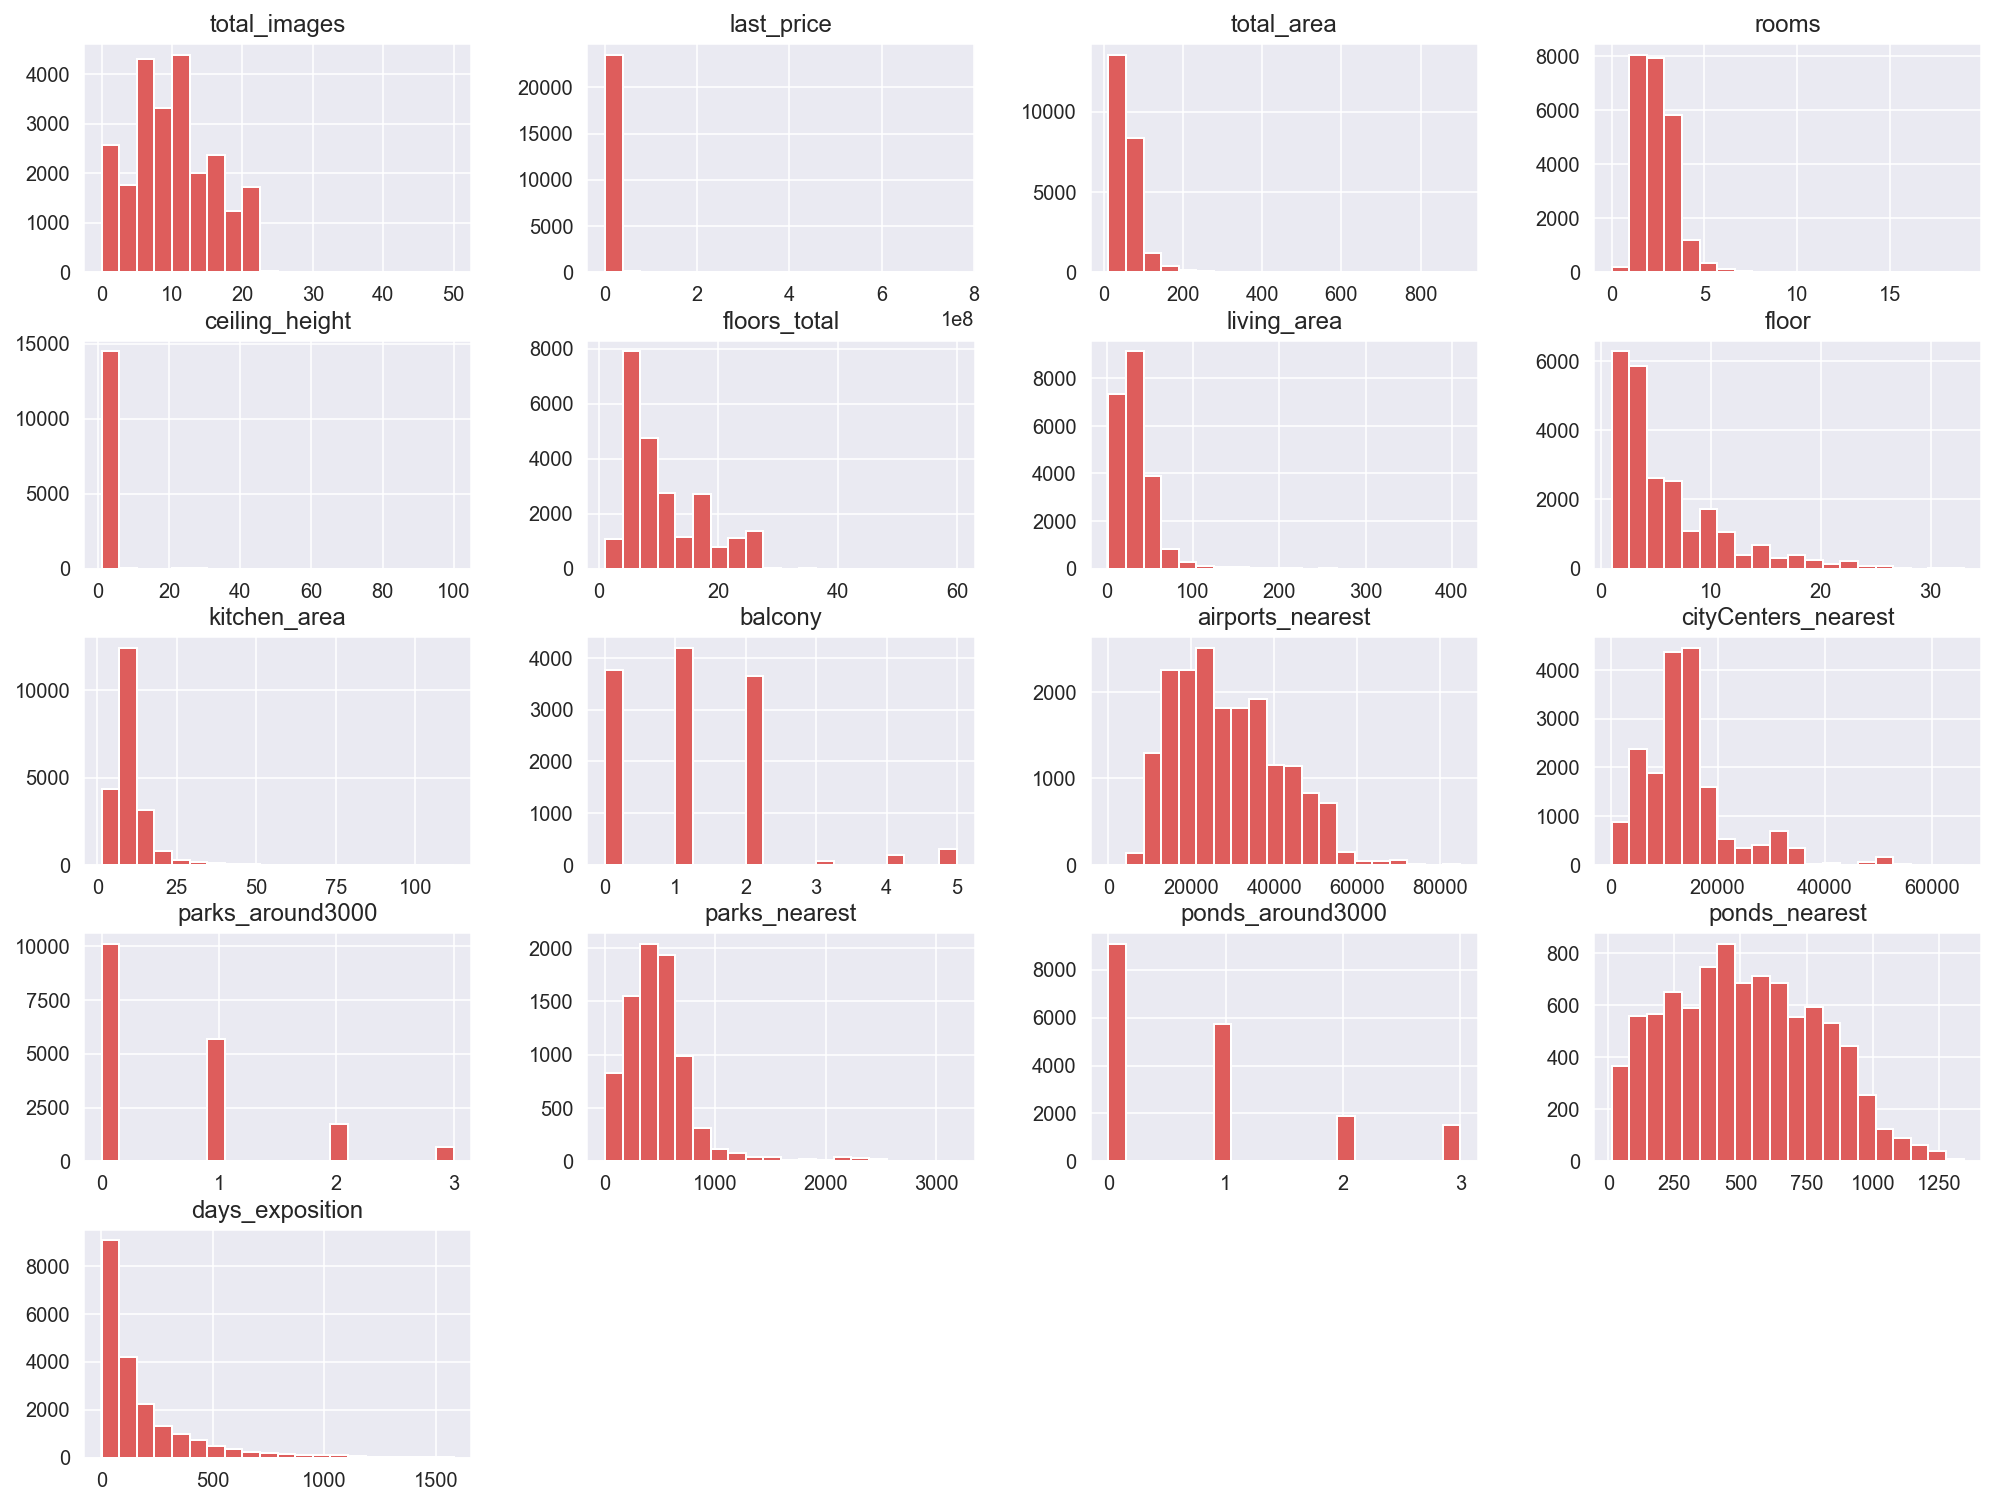

In [7]:
# Посмотрим на распределение данных по каждому столбцу
flare = sns.color_palette("flare", n_colors = 2)
sns.set_palette(flare)
sns.set_style('darkgrid')
data.hist(figsize = (17, 13), bins = 20)
plt.show()

### Вывод

Всего данные содержат 23699 строк и 22 колонки.

Тип данных float у дискретных значений в колонках `floors_total`, `balcony`, `days_exposition`, `ponds_around3000`, `parks_around3000` удобнее будет заменить на int. Данные со временем `first_day_exposition` нужно поменять на datetime, и булеву колонку `is_apartment` - с object на bool.

При этом в колонках `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` обнаружены пропуски.

Судя по графикам в данных имеются выбросы.

## Предобработка данных

### Обработка пропусков и преобразование типа данных

Сразу заполним данные в колонках `balcony`, `is_apartment`, `locality_name`.
Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. 
Исходя из этой же логики, если в объявлении не указан параметр апартаментов - то это должна быть обычная квартира.
В колонке с названиями местности - пропуски заменим на "неизвестно".

In [8]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['locality_name'] = data['locality_name'].fillna('неизвестно')

Заполним пропуски в размере жилой площади `living_area`. Пропуски в данных составляют 8%. Тип пропуска относится к категории MAR, т.к. заполнение пропуска возможно на основе имеющихся данных, и в целом, замена не приведет к существенному искажению данных. Т.к. у нас есть данные по общей площади всех объявлений, мы можем высчитать примерный размер жилой площади исходя из медианного отношения жилой площади к общей. 

In [9]:
# расчитаем поправку s, на которую затем будем умножать общую площадь в пропущенных значениях
s = (data[data['living_area'].isna() == False]['living_area']/data[data['living_area'].isna() == False]\
     ['total_area']).median()
# заполняем данными пустые значения
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * s

Также поступим с размером кухни `kitchen_area`. Пропуски в данных составлют практически 10%. Кухня относится к жилой площади. Поэтому будем рассчитывать медианное отношение площади кухни к жилой площади.

In [10]:
# расчитаем поправку m, на которую затем будем умножать жилую площадь в пропущенных значениях
m = (data[data['kitchen_area'].isna() == False]['kitchen_area']/data[data['kitchen_area'].isna() == False]\
     ['living_area']).median()
# заполняем данными пустые значения
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data.loc[data['kitchen_area'].isna(), 'living_area'] * m

Пропуски в колонке с общей этажностью `floors_total` типа MCAR удалим. Количество пропущенных данных составляют 0.36%.

In [11]:
data.dropna(subset = 'floors_total', inplace = True)
data.reset_index(drop = True)
data.shape

(23613, 22)

Заполним пропуски в колонке с высотой потолков(`ceiling_height`). Пропуски данных составляли практически 39% от первоначального датасета. Важно данные по этим строкам сохранить. Тип пропуска относится к категории MAR, т.к. заполнение пропуска возможно на основе имеющихся данных. Заполнение произведем медианой из этажности зданий. 

Судя по графику в высоте потолков есть выбросы: некоторые потолки могут быть в 1м, а которые достигают 100 метров. При заполнении данных будем руководствоваться следующими утверждениями: высота потолков может быть от 2.4м до 5м(в некоторых сталинских домах встречается такая высота, судя по данным из интернета). В потолках размером более 20м возможно была совершена ошибка в запятой, поэтому такие данные поделим на 10. Изменим их в первую очередь, т.к. они могут исказить медианную высоту в дальнейших рассчетах.

In [12]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x / 10 if (x > 20) else x)

In [13]:
# количество аномальных значений, которые могут исказить данные при заполнении пропусков
data[(data['ceiling_height']<2.4) | (data['ceiling_height']>5)]['ceiling_height'].count()

37

In [14]:
# Заменим аномальные значения на np.nan
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: np.nan if (x > 5 or x < 2.4) else x)

In [15]:
# Заполняем пропуски в данных
for i in data['floors_total'].unique():
    data.loc[(data['floors_total'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == i), 'ceiling_height'].median()

In [16]:
# Проверим остались ли незаполненные значения
data[data['ceiling_height'].isna()==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.00,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,NaN,37.0,17.4,5,False,...,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


In [17]:
# Удалим данные, которые не удалось заполнить
data.drop(labels = [11575, 16934],axis = 0, inplace = True)
data.reset_index(drop = True)
data.shape

(23611, 22)

Проверим пропуски в колонке `first_day_exposition` сколько дней было размещено объявление (от публикации до снятия). Посмотрим на распределение пропусков во времени, чтобы определить категорию пропусков.

In [18]:
# Для построения графика, изменим тип данных в колонке "first_day_exposition"
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

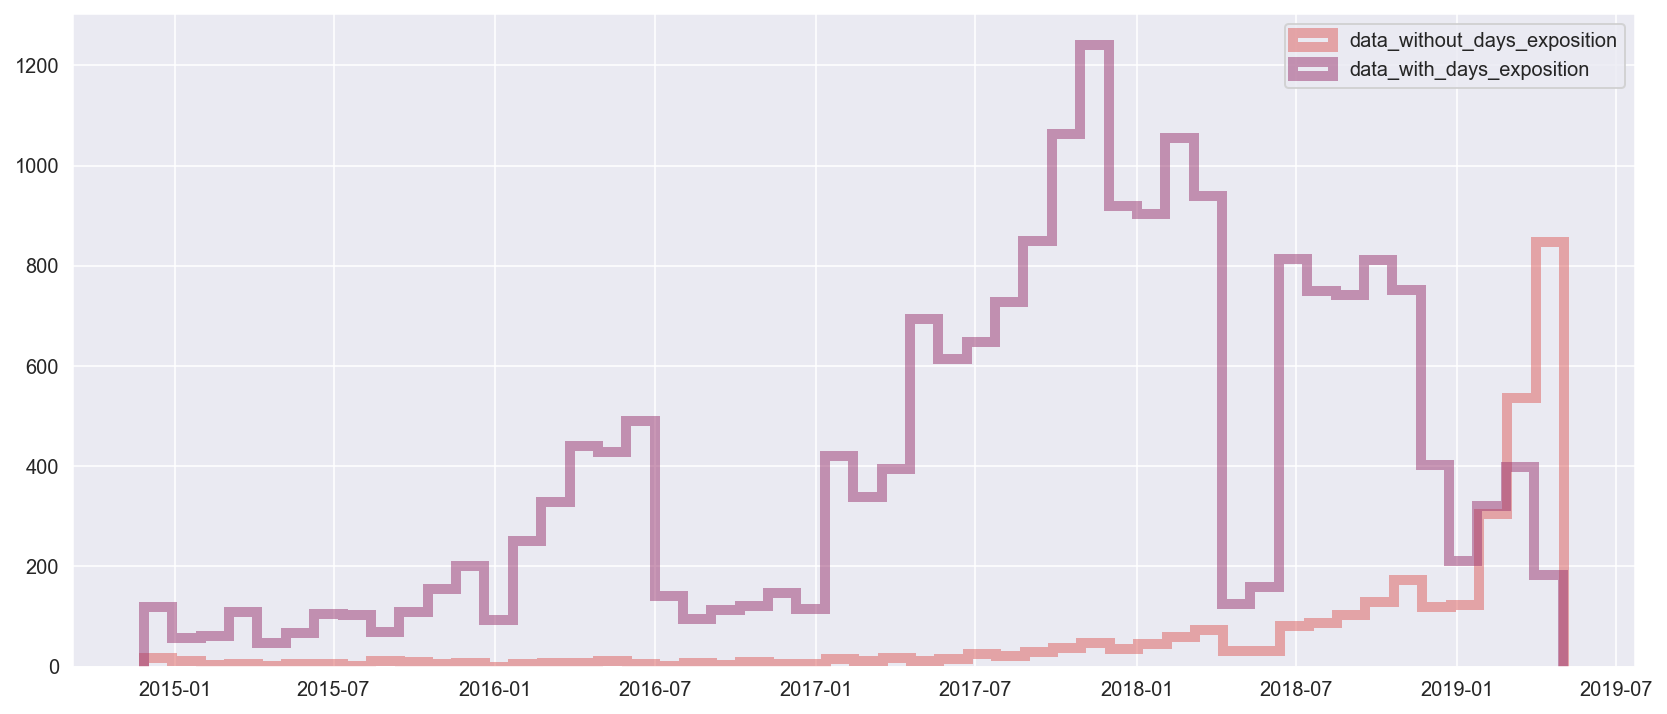

In [19]:
data[data['days_exposition'].isna() == True]['first_day_exposition'].hist(bins = 50, figsize = (14, 6), alpha = 0.5, histtype='step', linewidth=5, label = 'data_without_days_exposition')
data[data['days_exposition'].isna() == False]['first_day_exposition'].hist(bins = 50, figsize = (14, 6), alpha = 0.5, histtype='step', linewidth=5, label = 'data_with_days_exposition')
plt.legend()
plt.show()

Судя по распределению, до 2019 года пропуски в данных можно было отнести к категории MCAR. Но в 2019 году по всей видимости произошло какое-то резкое изменение в системе фиксации данных объявления. Возможно в системе был какой-то баг, и данный параметр перестал фиксироваться.
Либо, как предположение, эти данные были актуальны именно на начало 2019 года, и система просто еще не зафиксировала снятие объявления, в связи с этим и образовался пропуск в данных. В любом случае, образовались пропуски категории MNAR. Оставлю их как есть.

Такая же ситуация в колонках `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`. Т.к. данные картографические, они могли быть пропущены по техническим причинам. Заполнить корректно по имеющимся данным невозможно. А удаление такого большого колличества данных может исказить анализ. Также, оставлю данные с пропусками как есть.            

In [20]:
# Проверим количество оставшихся пропусков в процентах: 
data.isnull().sum()/len(data)*100 

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height           0.000000
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment             0.000000
studio                   0.000000
open_plan                0.000000
kitchen_area             0.000000
balcony                  0.000000
locality_name            0.000000
airports_nearest        23.429757
cityCenters_nearest     23.332345
parks_around3000        23.328110
parks_nearest           65.926898
ponds_around3000        23.328110
ponds_nearest           61.632290
days_exposition         13.434416
dtype: float64

В связи с тем, что в колонках `days_exposition`, `ponds_around3000`, `parks_around3000` остались пропущенные значения, преобразовать тип данных в int не получится. Оставим их в float. Для преобразования остались  колонки "floors_total", "balcony".

In [21]:
# Преообразуем тип данных в колонках из float в int
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23611 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23611 non-null  int64         
 1   last_price            23611 non-null  float64       
 2   total_area            23611 non-null  float64       
 3   first_day_exposition  23611 non-null  datetime64[ns]
 4   rooms                 23611 non-null  int64         
 5   ceiling_height        23611 non-null  float64       
 6   floors_total          23611 non-null  int64         
 7   living_area           23611 non-null  float64       
 8   floor                 23611 non-null  int64         
 9   is_apartment          23611 non-null  bool          
 10  studio                23611 non-null  bool          
 11  open_plan             23611 non-null  bool          
 12  kitchen_area          23611 non-null  float64       
 13  balcony         

### Устранение дубликатов

Проверим наличие явных и неявных дубликатов

In [23]:
# наличие явных дубликатов
data.duplicated().sum()

0

In [24]:
# наличие неявных дубликатов
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [25]:
data.locality_name.nunique()

365

Заметила одни и те же названия, написанные немного по-разному. Исправим названия поселков.

In [26]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')

In [27]:
data.locality_name.nunique()

323

Изначально в колонке `locality_name` было 365 уникальных названий. После устранения неявных дубликатов остались 323 уникальных названия.

### Обработка и удаление аномалий

Посмотрим краткую статистическую сводку данных. 

In [28]:
# Для более удобного отображения колонки 'last_price' - поделим ее на 10**6
data['last_price'] = data['last_price']/10**6
data.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23611.00,23611.00,23611.00,23611.00,23611.00,23611.00,23611.00,23611.00,23611.00,23611.00,18079.00,18102.00,18103.00,8045.00,18103.00,9059.00,20439.00
mean,9.87,6.54,60.34,2.07,2.71,10.67,34.59,5.88,10.51,0.59,28789.12,14184.39,0.61,490.55,0.77,518.31,180.90
std,5.68,10.90,35.65,1.08,0.23,6.59,22.35,4.87,6.05,0.96,12626.47,8614.36,0.80,341.34,0.94,277.84,219.69
min,0.00,0.01,12.00,0.00,2.40,1.00,2.00,1.00,0.61,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.40,40.00,1.00,2.55,5.00,19.00,2.00,7.00,0.00,18574.50,9233.25,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.65,52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26729.00,13092.00,0.00,455.00,1.00,503.00,95.00
75%,14.00,6.80,69.80,3.00,2.75,16.00,42.10,8.00,12.00,1.00,37243.00,16285.00,1.00,612.00,1.00,730.00,232.00
max,50.00,763.00,900.00,19.00,5.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Сразу бросаются в глаза значения у таких колонок как `last_price`, `total_area`, `rooms`, `floors_total`, `kitchen_area`. Рассмотрим их на графиках. Начнем с колонки `total_area`. Построим гистограмму и боксплот для примерного определения выбросов в данных.

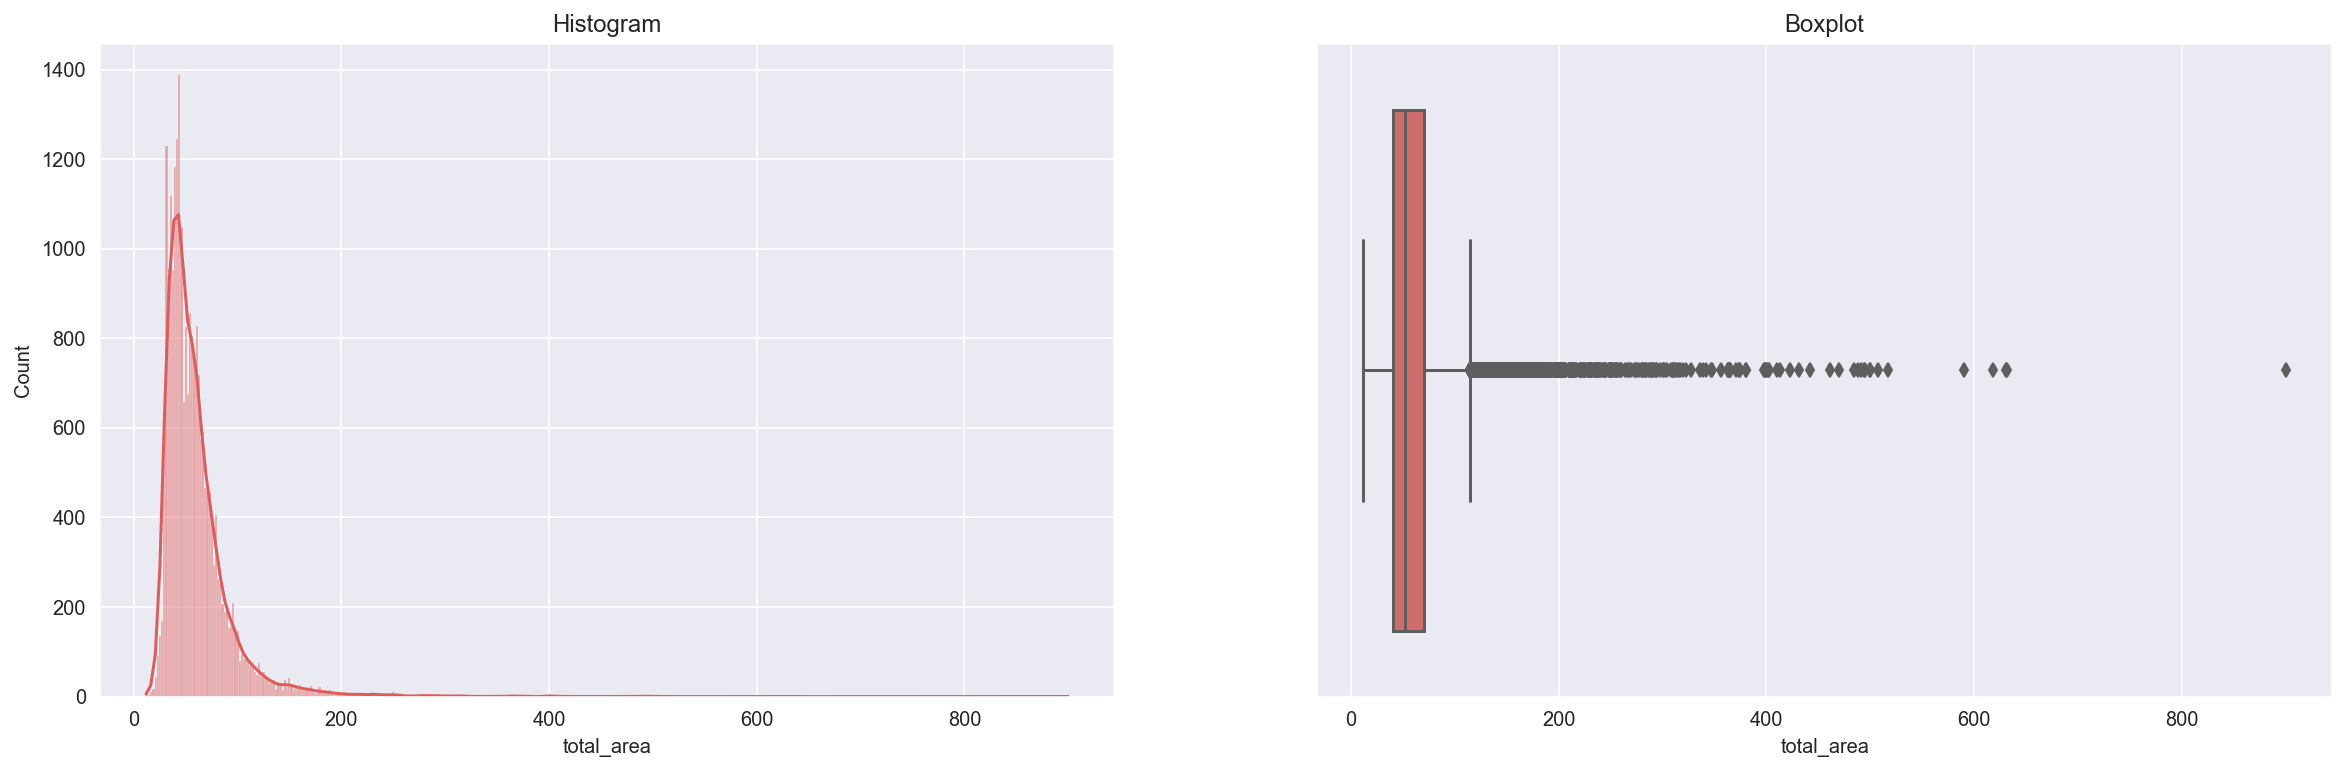

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=data, x='total_area', kde=True, ax=ax1)
sns.boxplot(x=data['total_area'], ax=ax2)
ax1.set_title('Histogram')
ax2.set_title('Boxplot')
plt.show()

In [30]:
# Проверим количество аномальных значений. Максимально допустимую площадь будем считать за 120 исходя из графиков.
print(data.loc[data['total_area']>120]['total_area'].count(), '-' , round(data[data['total_area']>120]['total_area']\
                                                                      .count()/23699*100, 2), '% от начальных данных')

1058 - 4.46 % от начальных данных


Избавимся от выбросов в общей площади. Это соответственно должно сократить выбросы и в остальных рассматриваемых колонках.

In [31]:
data = data.loc[data['total_area']<=120]

Проверим теперь данные в колонке `rooms`. Бросается в глаза минимальное значение в 0 комнат.

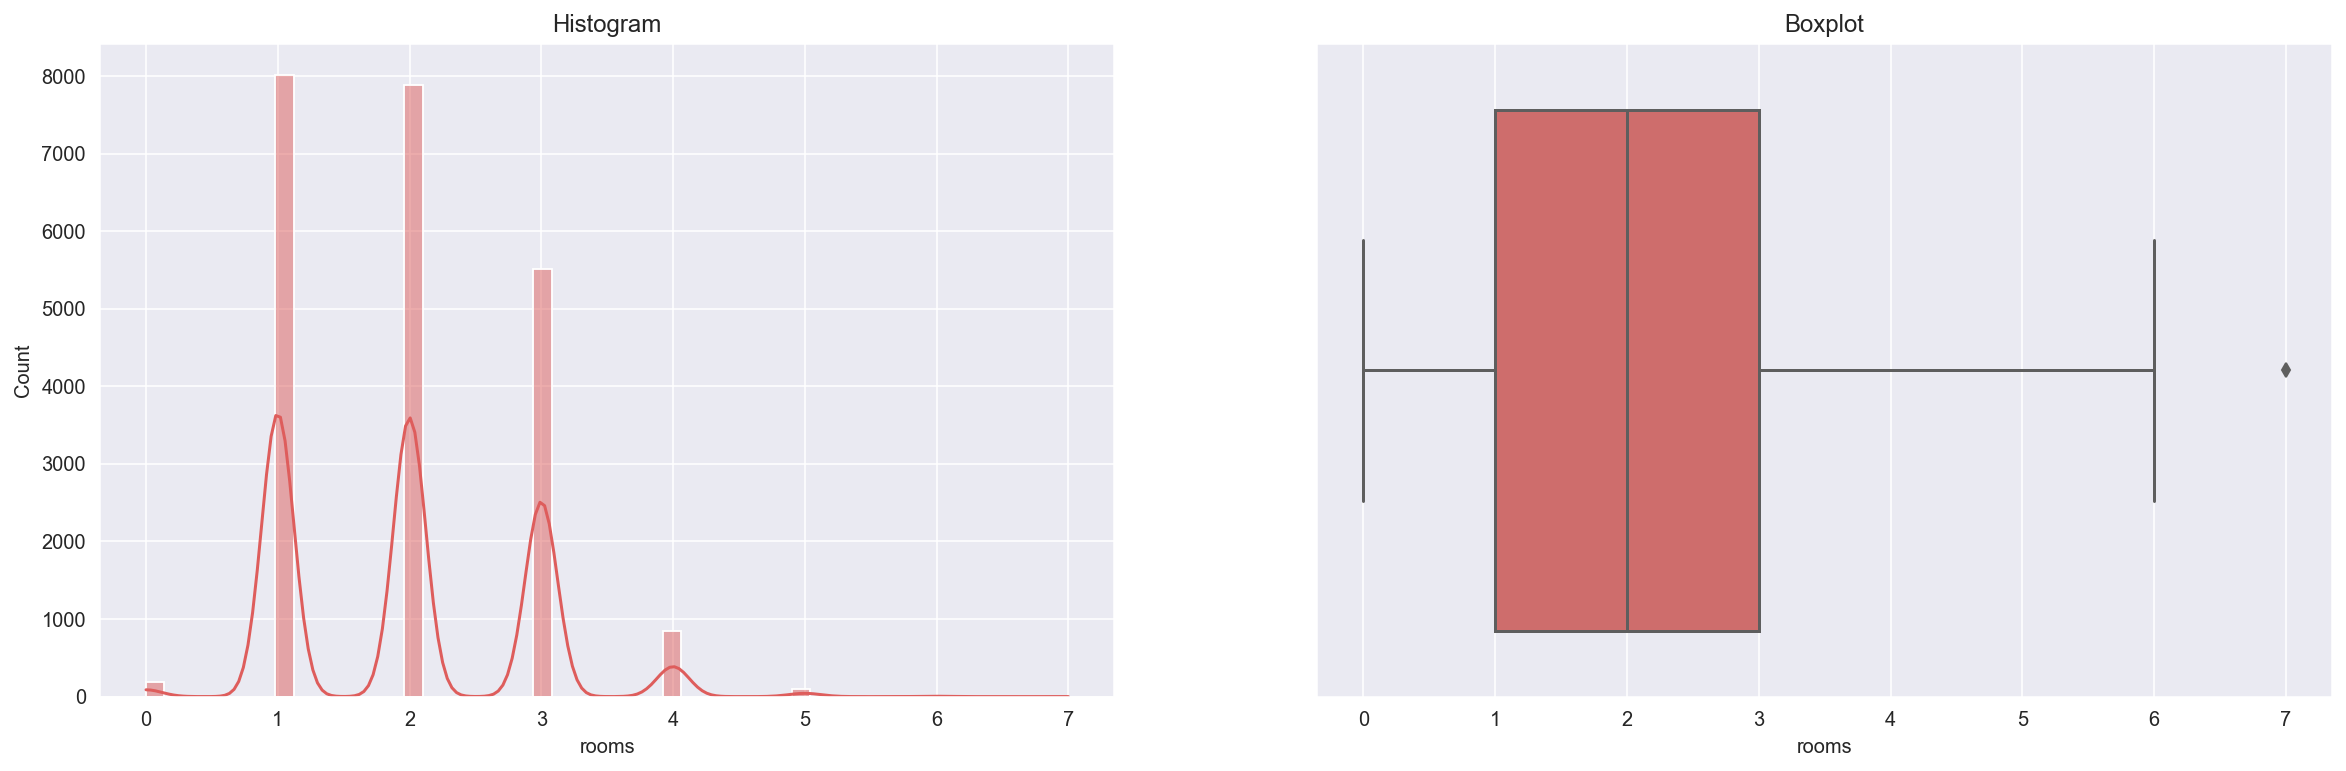

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=data, x='rooms', kde=True, ax=ax1)
sns.boxplot(x=data['rooms'], ax=ax2)
ax1.set_title('Histogram')
ax2.set_title('Boxplot')
plt.show()

In [33]:
# Проверим количество аномальных значений. Максимально допустимое колличество комнат будем считать - 6.
print(data.loc[(data['rooms']>6) | (data['rooms']<1)]['rooms'].count(), '-', round(data.loc[(data['rooms']>6)\
                                    | (data['rooms']<1)]['rooms'].count()/23699*100, 2), '% от начальных данных')

194 - 0.82 % от начальных данных


Избавимся от выбросов в комнатах.

In [34]:
data = data.loc[(data['rooms']<=6) & (data['rooms']>0)]

Проверим выбросы в колонке `floors_total`. И избавимся от выбросов по такой же схеме.

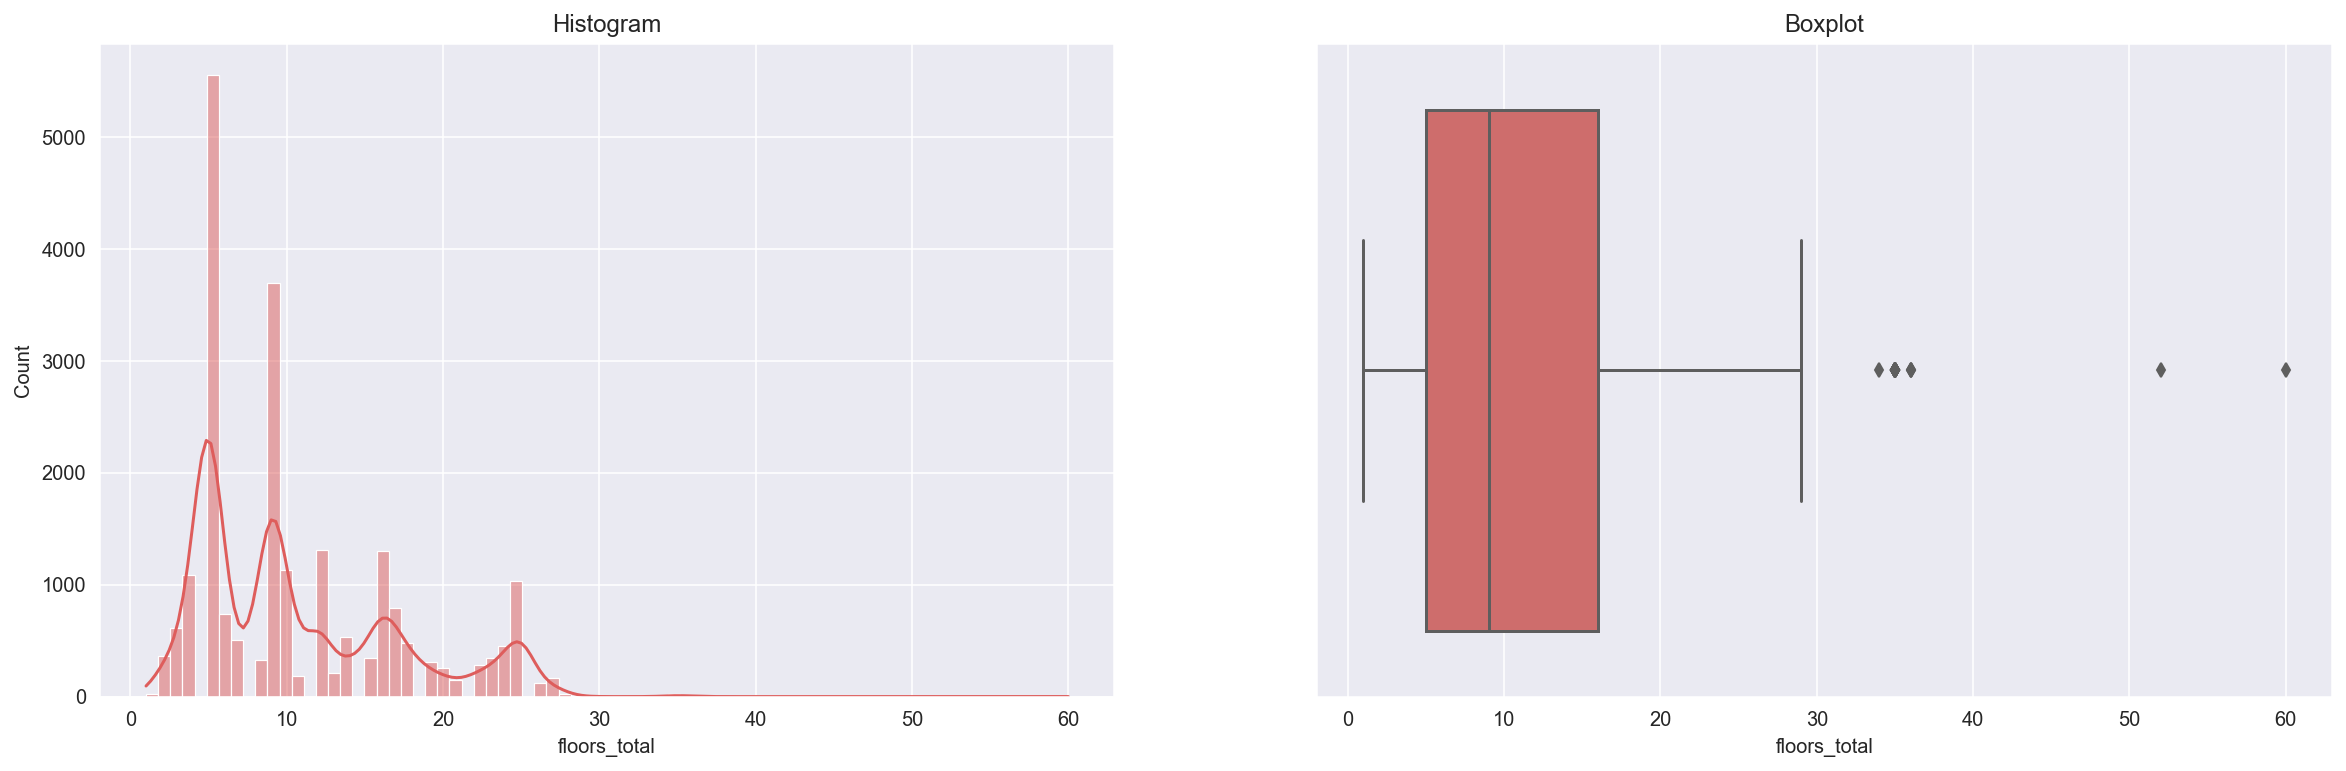

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=data, x='floors_total', kde=True, ax=ax1)
sns.boxplot(x=data['floors_total'], ax=ax2)
ax1.set_title('Histogram')
ax2.set_title('Boxplot')
plt.show()

In [36]:
print(data[data['floors_total']>30]['floors_total'].count(), '-', round(data[data['floors_total']>30]\
                                                        ['floors_total'].count()/23699*100, 2), '% от начальных данных')

28 - 0.12 % от начальных данных


In [37]:
data = data.loc[data['floors_total']<=30]

Проверим выбросы в колонке `last_price`.

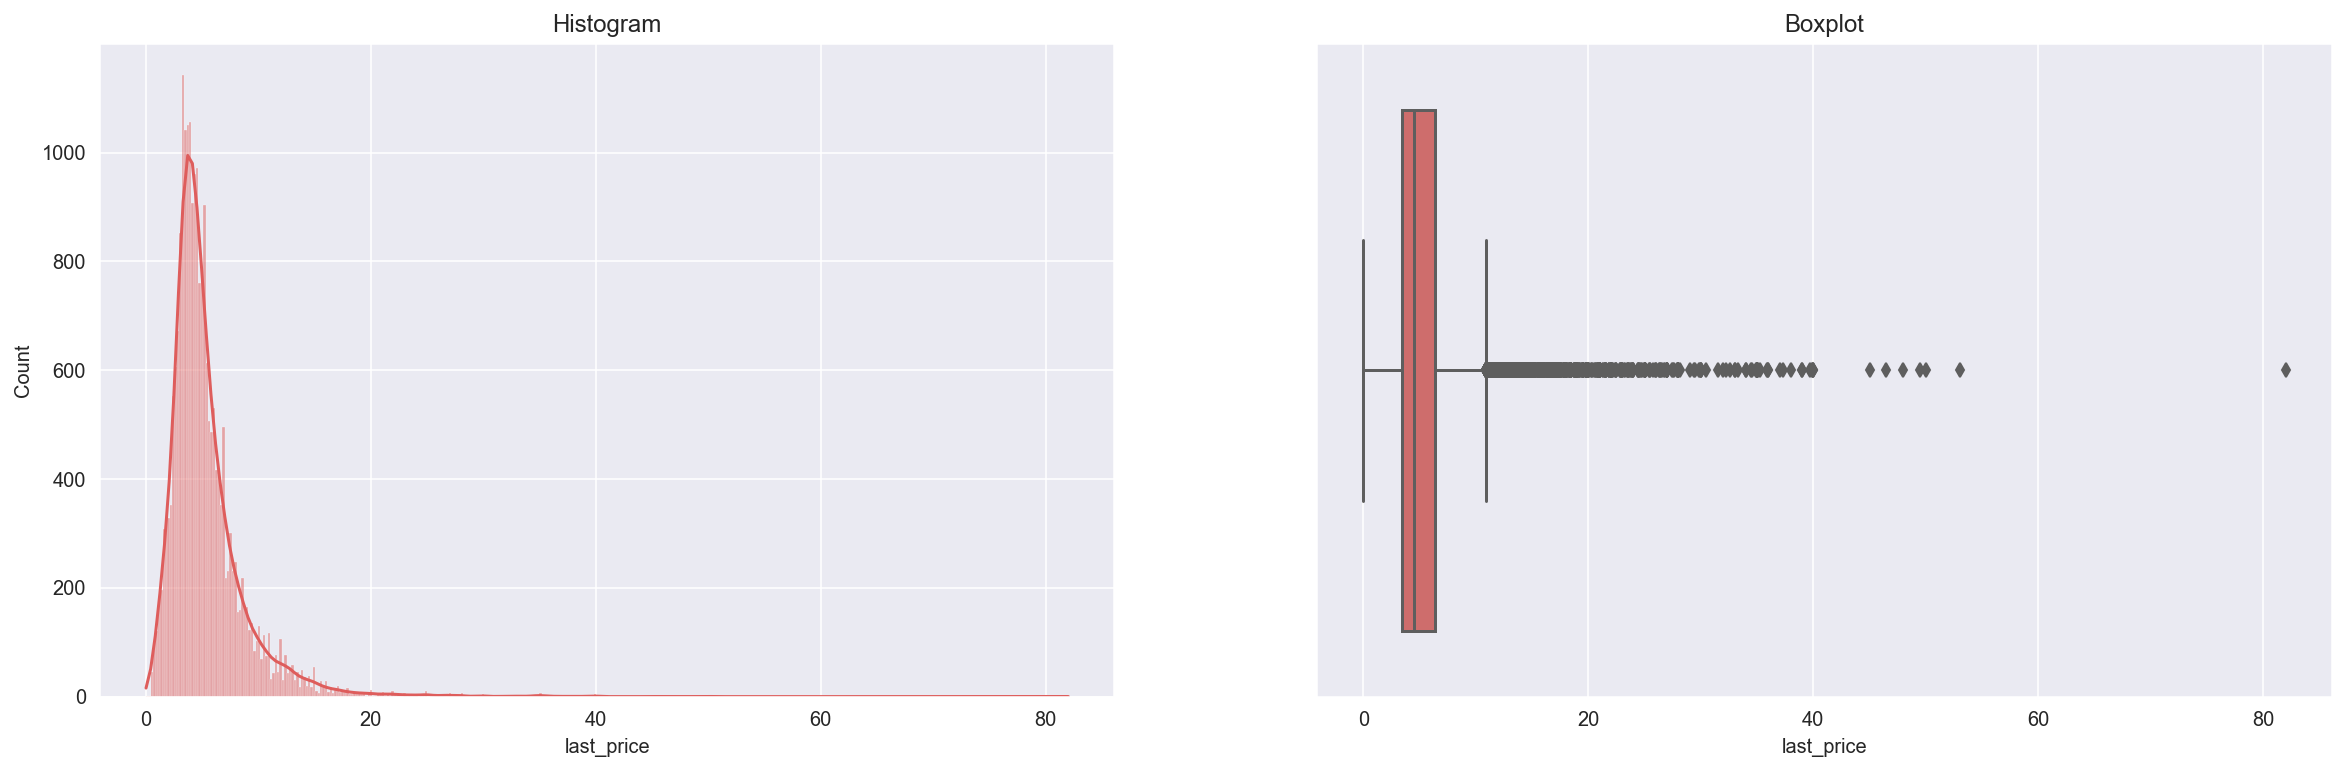

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=data, x='last_price', kde=True, ax=ax1)
sns.boxplot(x=data['last_price'], ax=ax2)
ax1.set_title('Histogram')
ax2.set_title('Boxplot')
plt.show()

In [39]:
data[(data['last_price']>12)|(data['last_price']<=0.02)]['last_price'].count()

1007

In [40]:
print(data[(data['last_price']>12)|(data['last_price']<=0.02)]['last_price'].count(), '-', \
round(data[(data['last_price']>12)|(data['last_price']<=0.02)]['last_price'].count()\
                                                /23699*100, 2), '% от начальных данных')

1007 - 4.25 % от начальных данных


In [41]:
data = data[(data['last_price']<=12)&(data['last_price']>0.02)]

Проверим и удалим выбросы в колонке `last_price`.

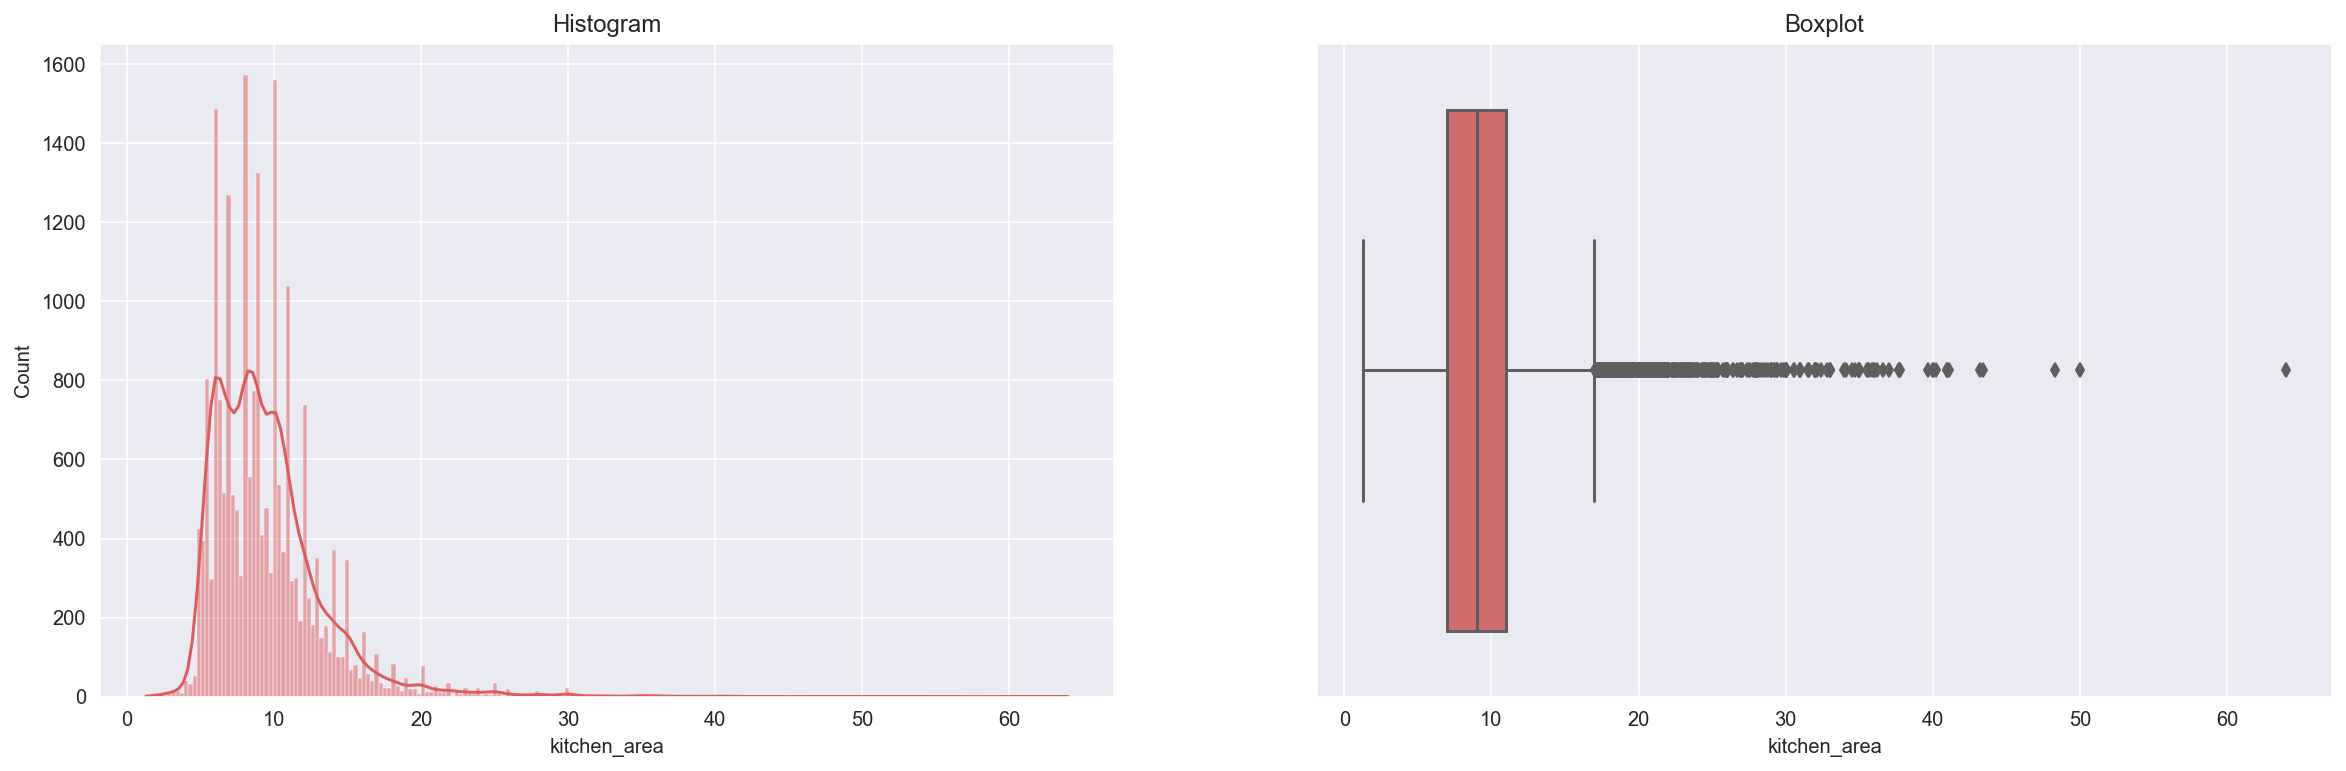

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=data, x='kitchen_area', kde=True, ax=ax1)
sns.boxplot(x=data['kitchen_area'], ax=ax2)
ax1.set_title('Histogram')
ax2.set_title('Boxplot')
plt.show()

In [43]:
print(data[data['kitchen_area']>20]['kitchen_area'].count(), '-', round(data[data['kitchen_area']>20]\
                                                ['kitchen_area'].count()/23699*100, 2), '% от начальных данных')

392 - 1.65 % от начальных данных


In [44]:
data = data[data['kitchen_area']<=20]

In [45]:
# посмотрим как изменились наши статистические данные

data.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20932.00,20932.00,20932.00,20932.00,20932.00,20932.00,20932.00,20932.00,20932.00,20932.00,15612.00,15624.00,15625.00,6511.00,15625.00,7449.00,18384.00
mean,9.69,4.80,52.77,1.93,2.68,10.68,30.36,5.84,9.23,0.59,28939.52,15013.48,0.56,488.68,0.70,533.75,172.46
std,5.53,2.20,17.77,0.88,0.19,6.53,12.74,4.85,3.03,0.94,13008.46,8528.36,0.76,329.02,0.88,276.08,210.36
min,0.00,0.43,12.00,1.00,2.40,1.00,2.00,1.00,1.30,0.00,0.00,208.00,0.00,1.00,0.00,16.00,1.00
25%,6.00,3.30,39.00,1.00,2.55,5.00,18.46,2.00,7.00,0.00,18012.00,10657.25,0.00,289.00,0.00,319.00,44.00
50%,9.00,4.40,49.00,2.00,2.64,9.00,29.00,4.00,8.90,0.00,27122.00,13641.50,0.00,456.00,0.00,522.00,91.00
75%,14.00,5.95,63.00,3.00,2.75,16.00,39.00,8.00,11.00,1.00,37668.00,16698.00,1.00,613.00,1.00,743.00,219.00
max,39.00,12.00,120.00,6.00,5.00,29.00,100.00,27.00,20.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [46]:
data.reset_index(drop = True)
data.shape

(20932, 22)

### Вывод

В ходе предобработки данных были устранены пропуски - там, где это было возможно. Колонки `living_area` и `kitchen_area` были заполнены медианными значениями. Пропущенные значения в `locality_name` были заполнены значением "неизвестно". В картографических данных и в колонке `days_exposition` пропуски сохранены, во избежание искажения дальнейшего анализа данных.
Также, были выявлены и устранены неявные дубликаты в `locality_name`.
Изменены типы данных в колонках `floors_total`, `balcony`, `first_day_exposition` и `is_apartment`.

Из датасета были удалены все выбивающиеся значения.
По итоговым статистическим данным вышла вполне правдивая картина.  
Всего, в ходе предобработки данных, из датасета были удалены **11,67% данных**, т.к. аномальные значения, также, могли искозить последующий анализ. 

## Добавление новых столбцов в таблицу

Добавим в таблицу следующие столбцы:

- `price_sq_m` - цена одного квадратного метра;
- `week_day` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `month` - месяц публикации объявления;
- `year` - год публикации объявления;
- `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»);
- `to_centre_km` - расстояние до центра города в километрах.

In [47]:
data['price_sq_m'] = data['last_price']/data['total_area']
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [48]:
# напишем функцию для определения типа этажа
def categorize_floor_type(row):
    floor = row['floor']
    total_floor = row['floors_total']
    try:
        if floor == 1:
            floor_type = 'первый'
        elif floor == total_floor:
            floor_type = 'последний'
        else:
            floor_type = 'другой'
    
        return floor_type        
    except:
        pass

In [49]:
data['floor_type'] = data.apply(categorize_floor_type, axis = 1)
data['to_centre_km'] = data['cityCenters_nearest']/1000

## Исследовательский анализ данных

### Изучение параметров объектов

Изучим подробнее следующие параметры объектов:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров

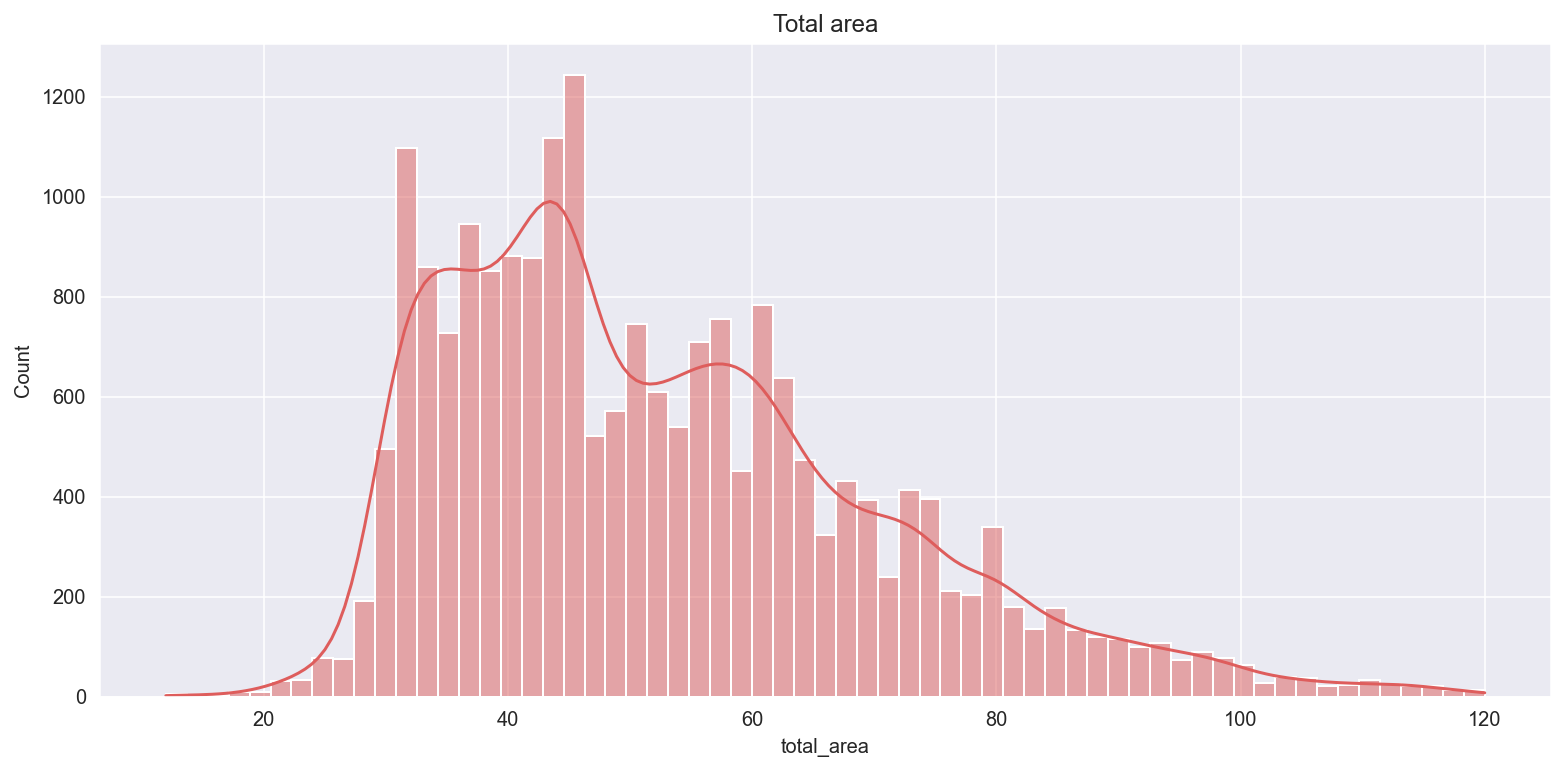

In [50]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='total_area', kde=True, ax=ax1)
ax1.set_title('Total area')
plt.show()

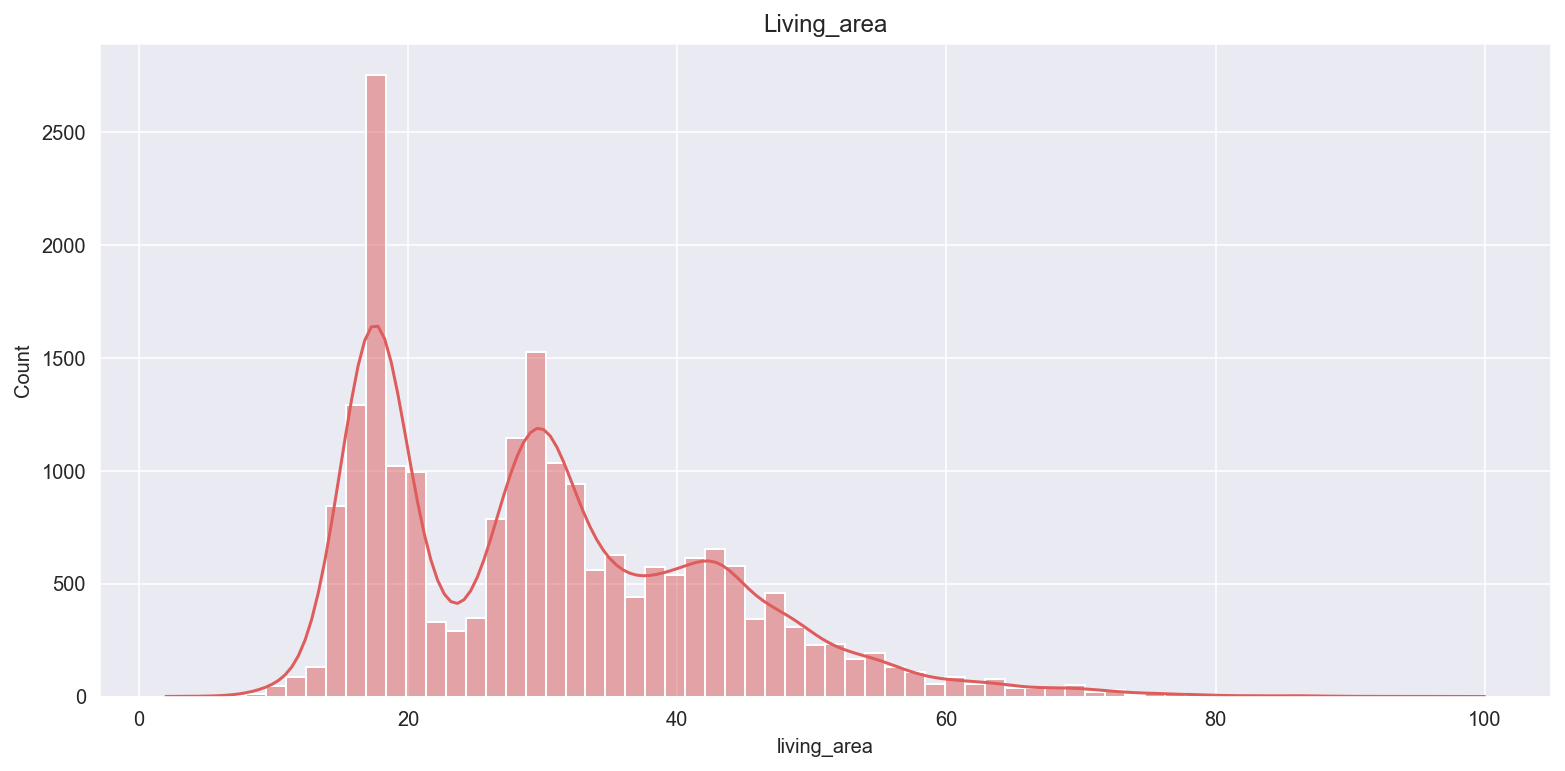

In [51]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='living_area', kde=True, ax=ax1)
ax1.set_title('Living_area')
plt.show()

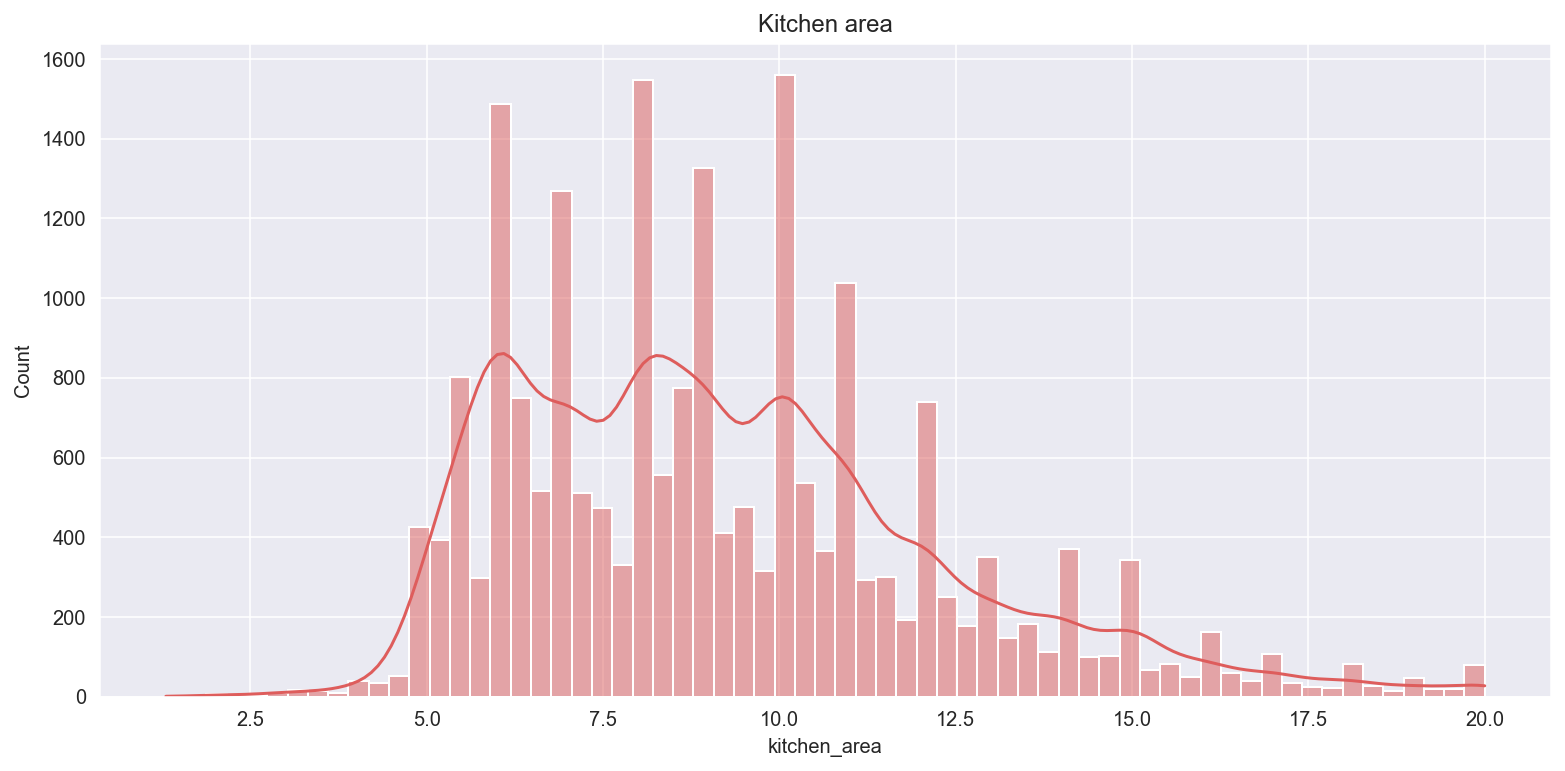

In [52]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='kitchen_area', kde=True, ax=ax1)
ax1.set_title('Kitchen area')
plt.show()

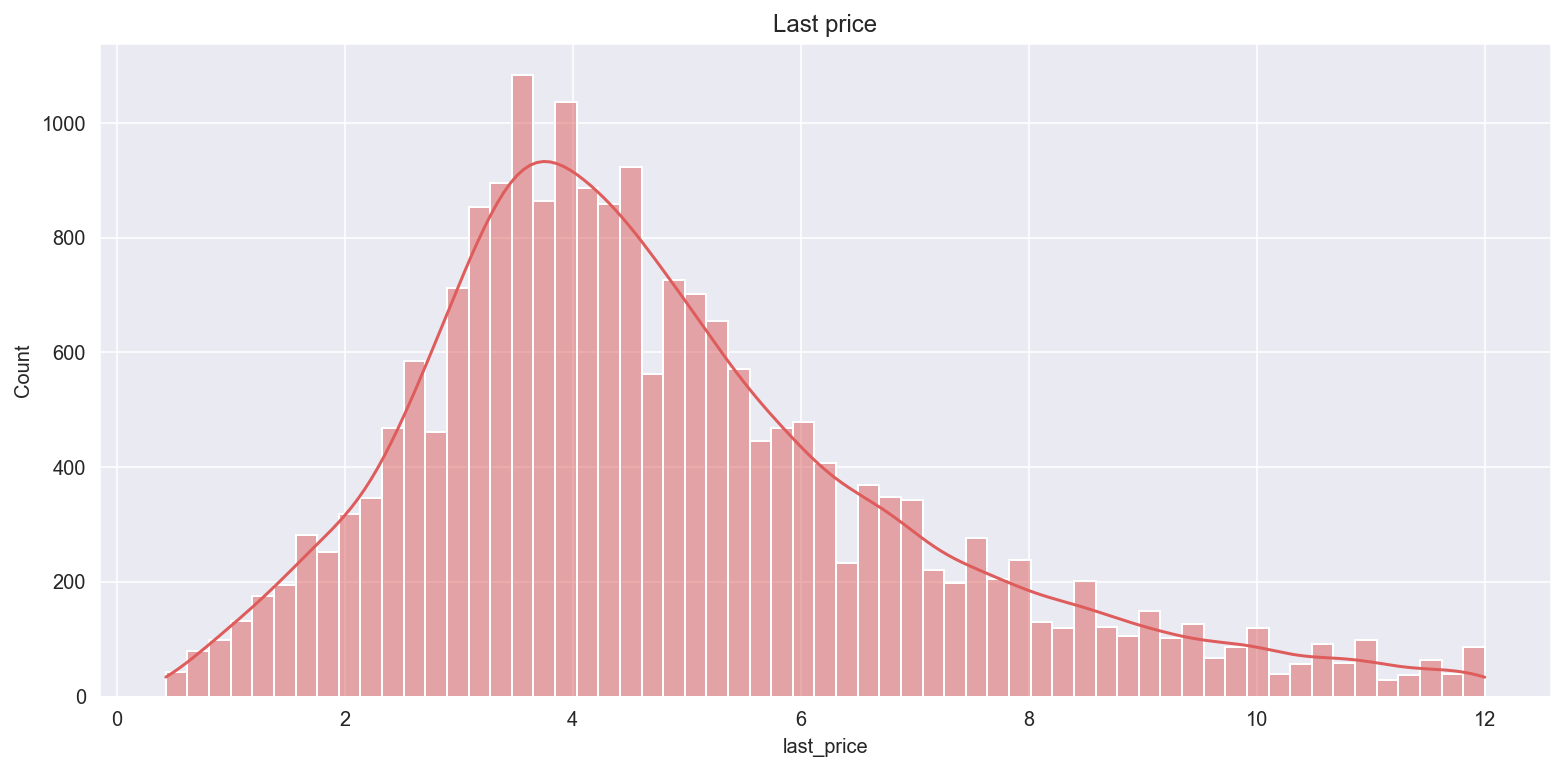

In [53]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='last_price', kde=True, ax=ax1)
ax1.set_title('Last price')
plt.show()

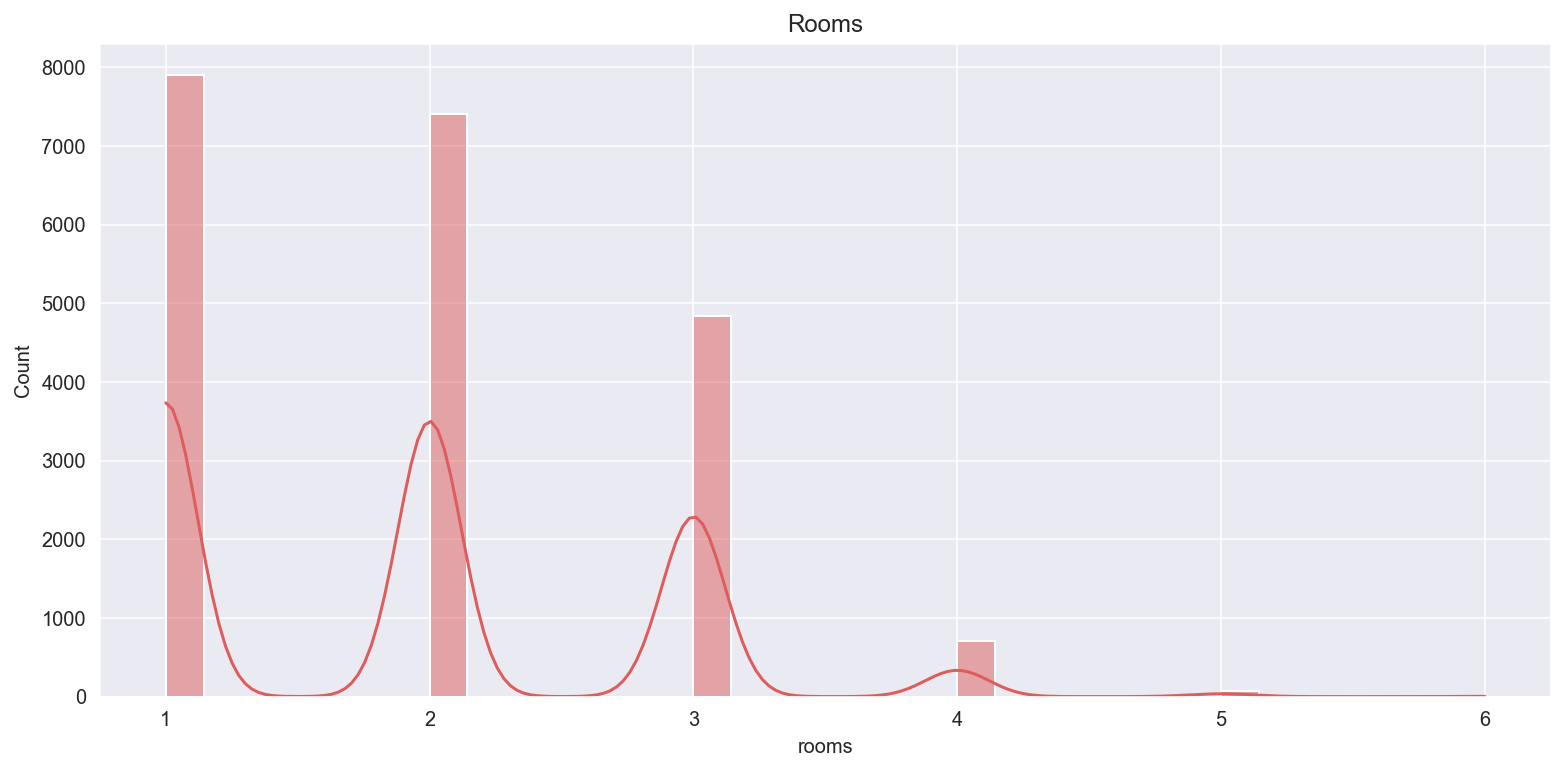

In [54]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='rooms', kde=True, ax=ax1)
ax1.set_title('Rooms')
plt.show()


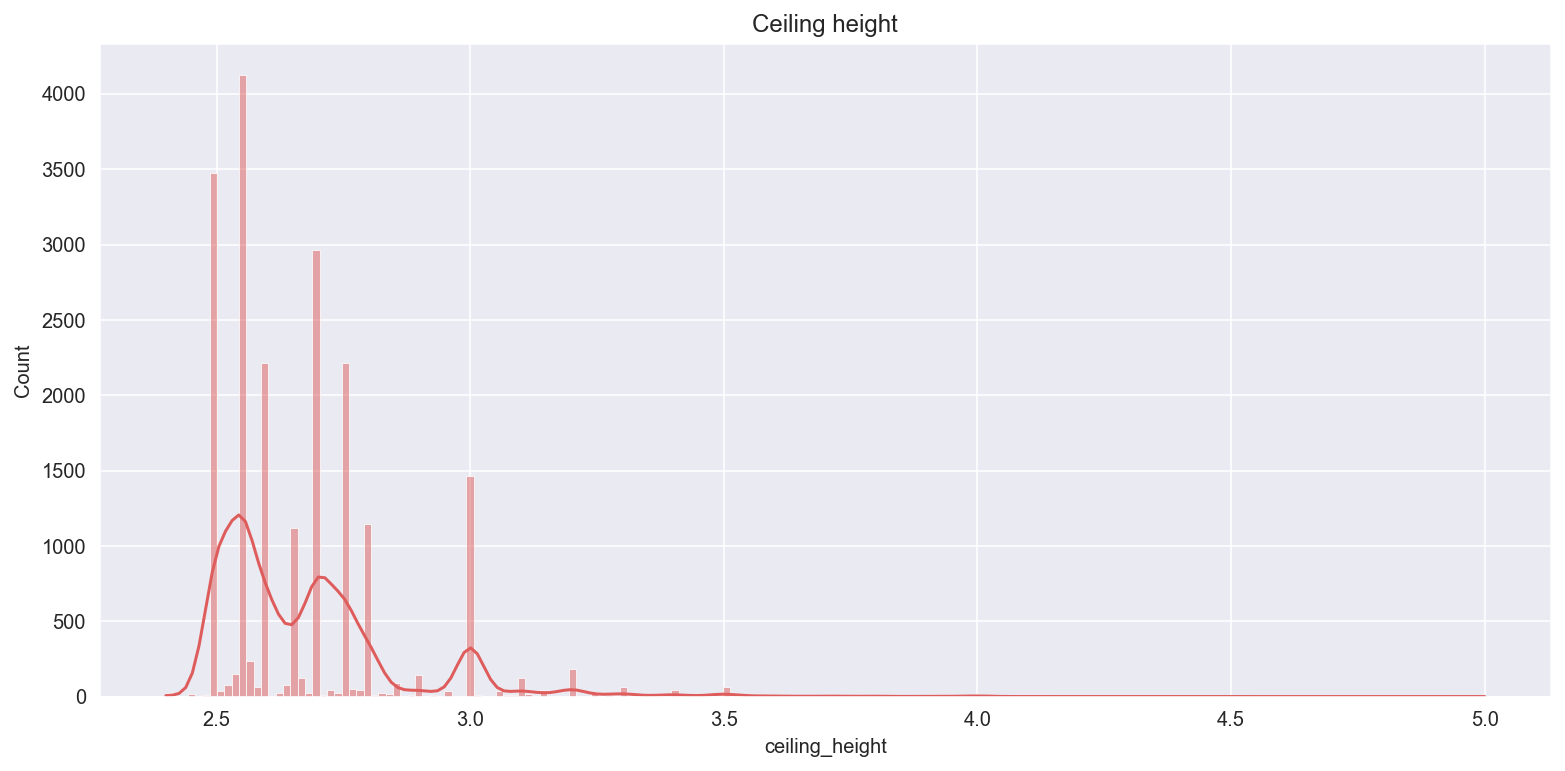

In [55]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='ceiling_height', kde=True, ax=ax1)
ax1.set_title('Ceiling height')
plt.show()


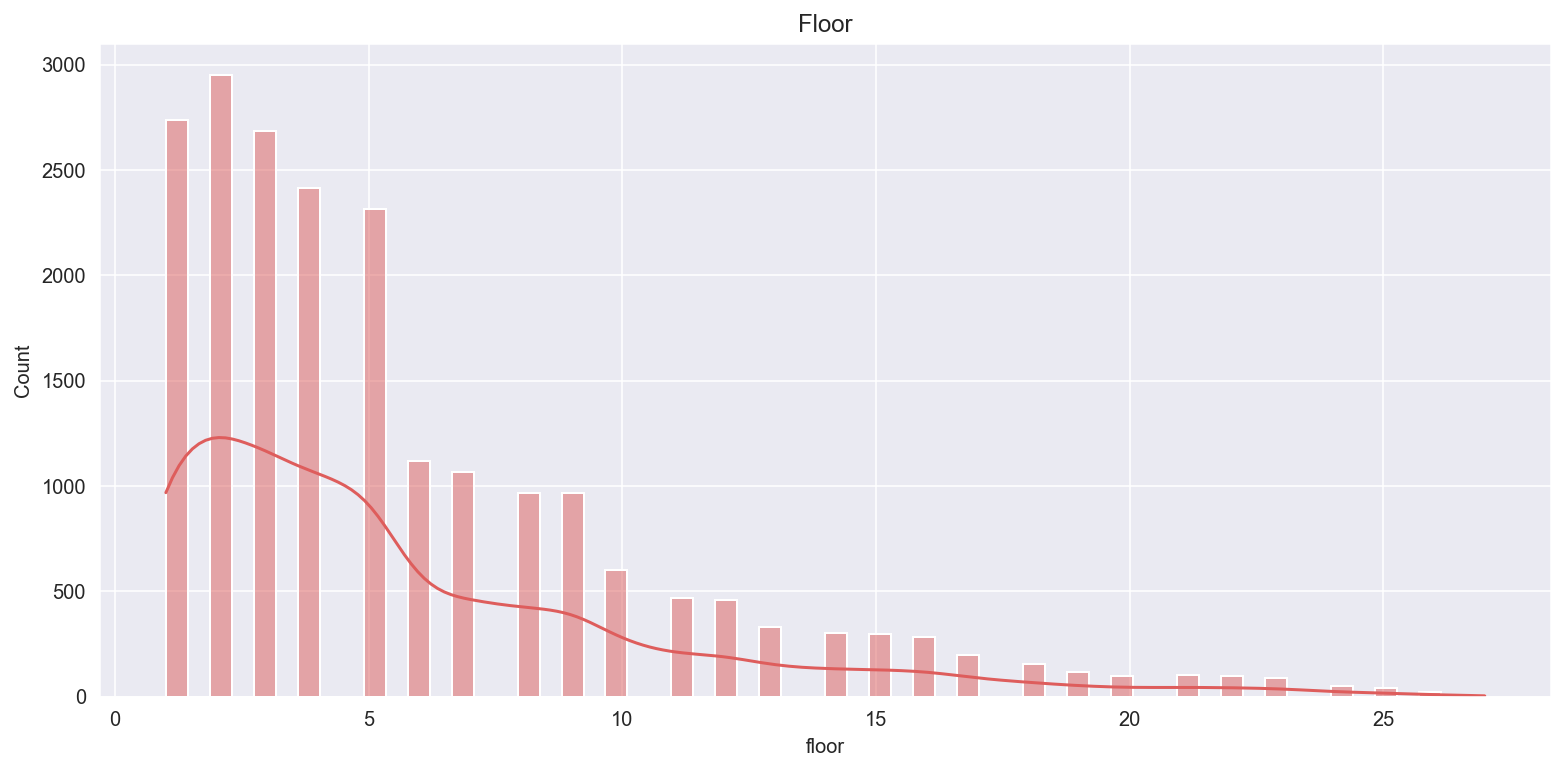

In [56]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='floor', kde=True, ax=ax1)
ax1.set_title('Floor')
plt.show()


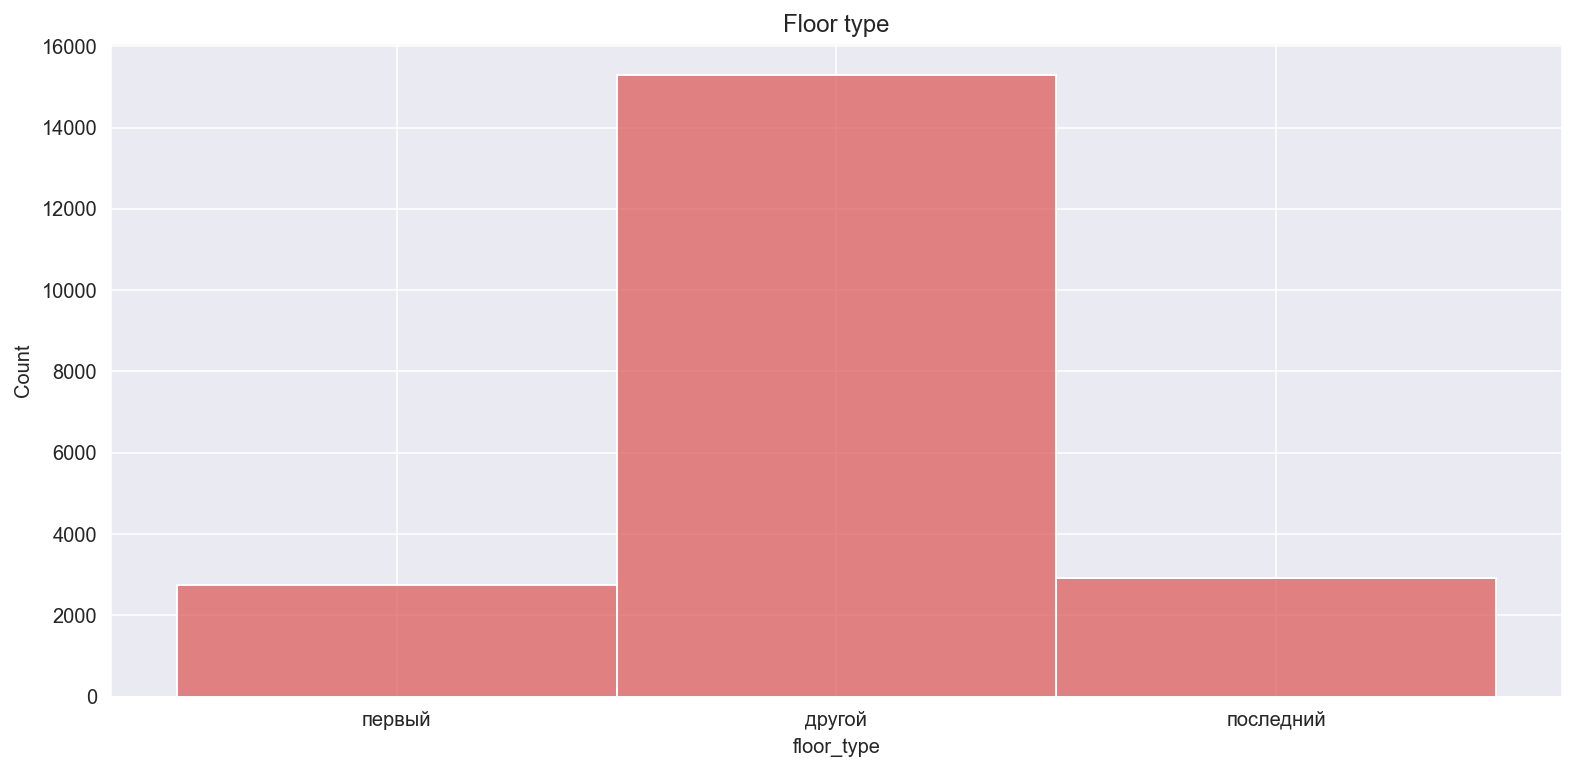

In [57]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='floor_type', ax=ax1)
ax1.set_title('Floor type')
plt.show()


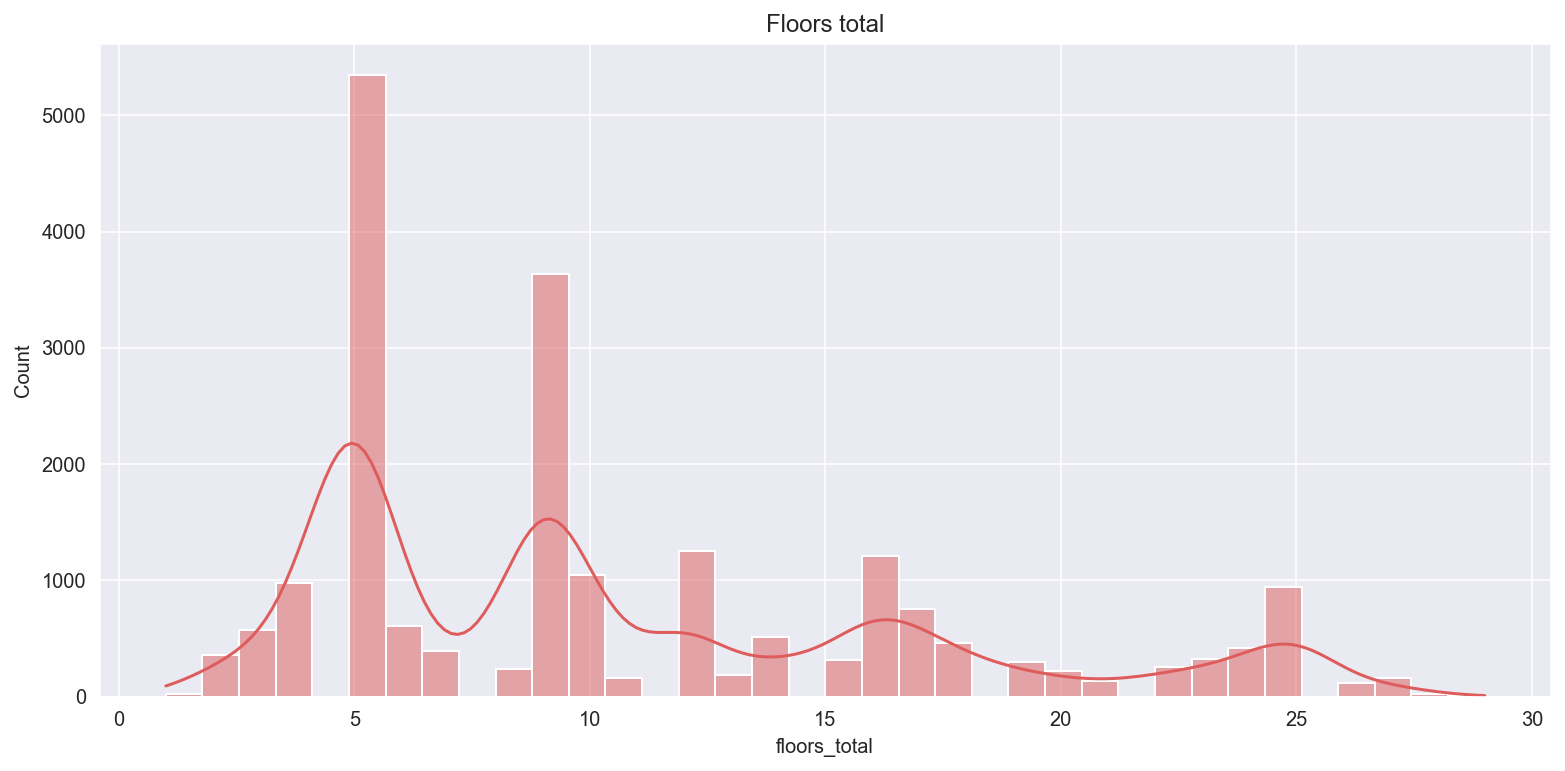

In [58]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='floors_total', kde=True, ax=ax1)
ax1.set_title('Floors total')
plt.show()


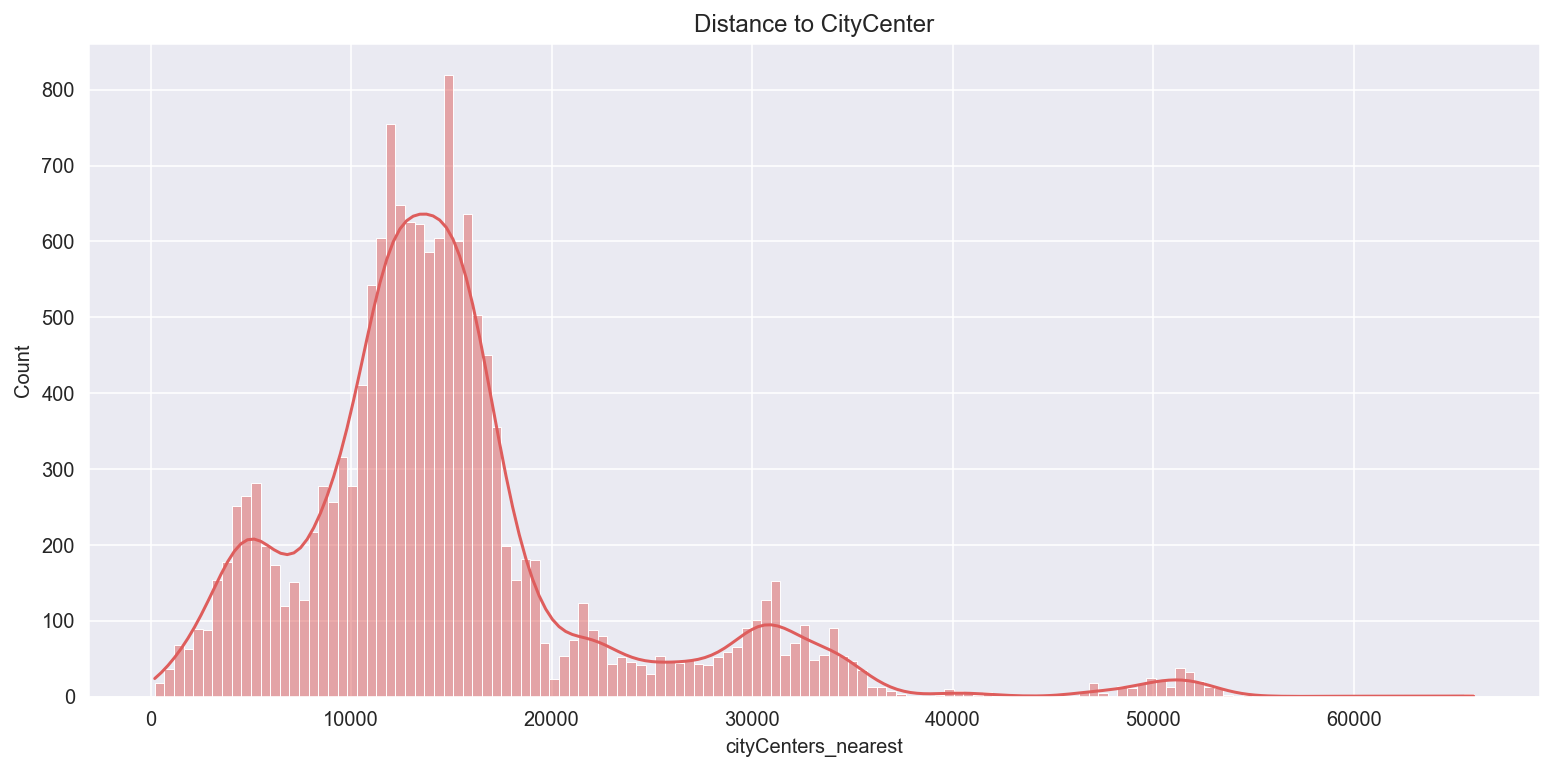

In [59]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='cityCenters_nearest', kde=True, ax=ax1)
ax1.set_title('Distance to CityCenter')
plt.show()


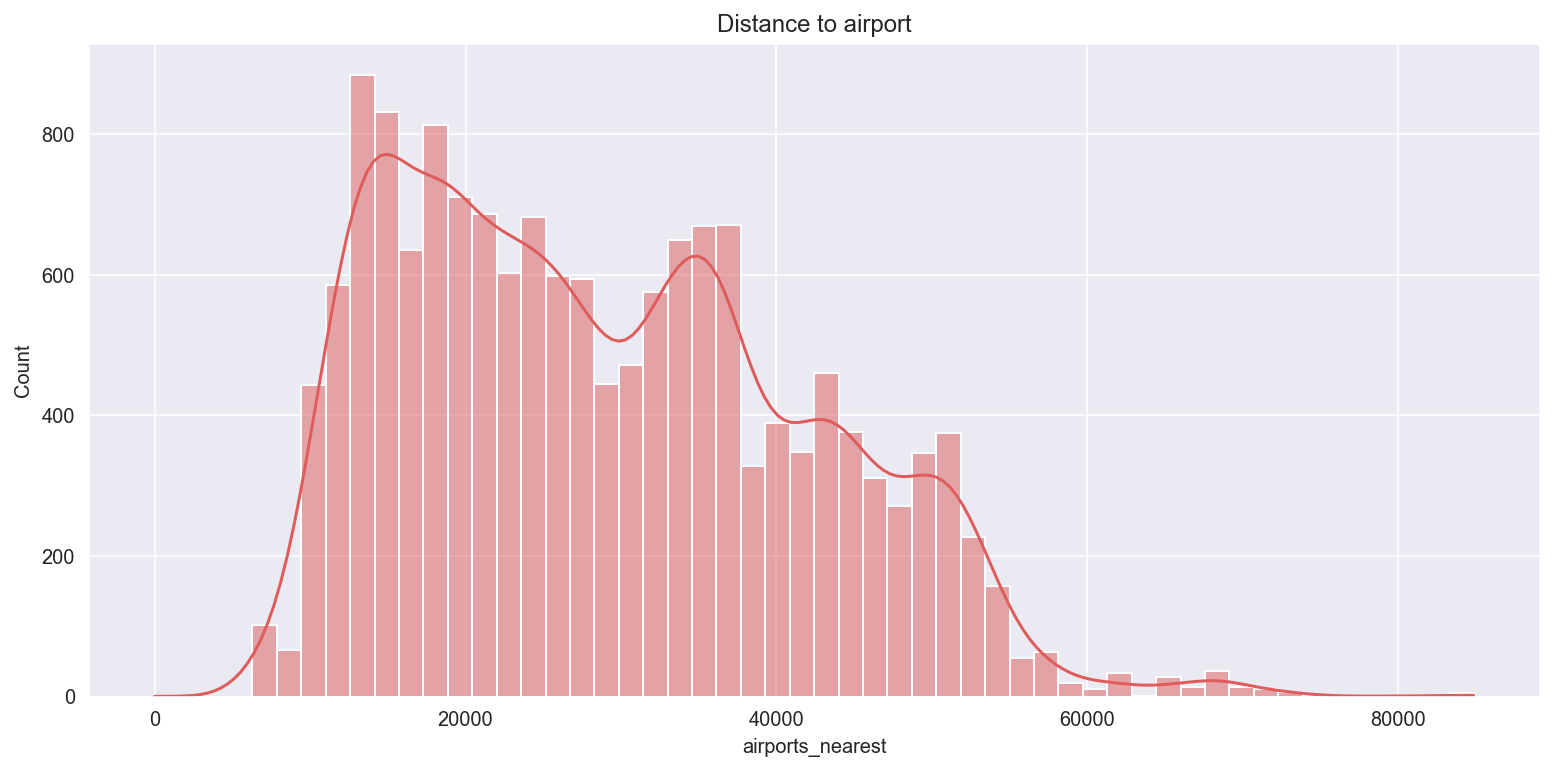

In [60]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='airports_nearest', kde=True, ax=ax1)
ax1.set_title('Distance to airport')
plt.show()

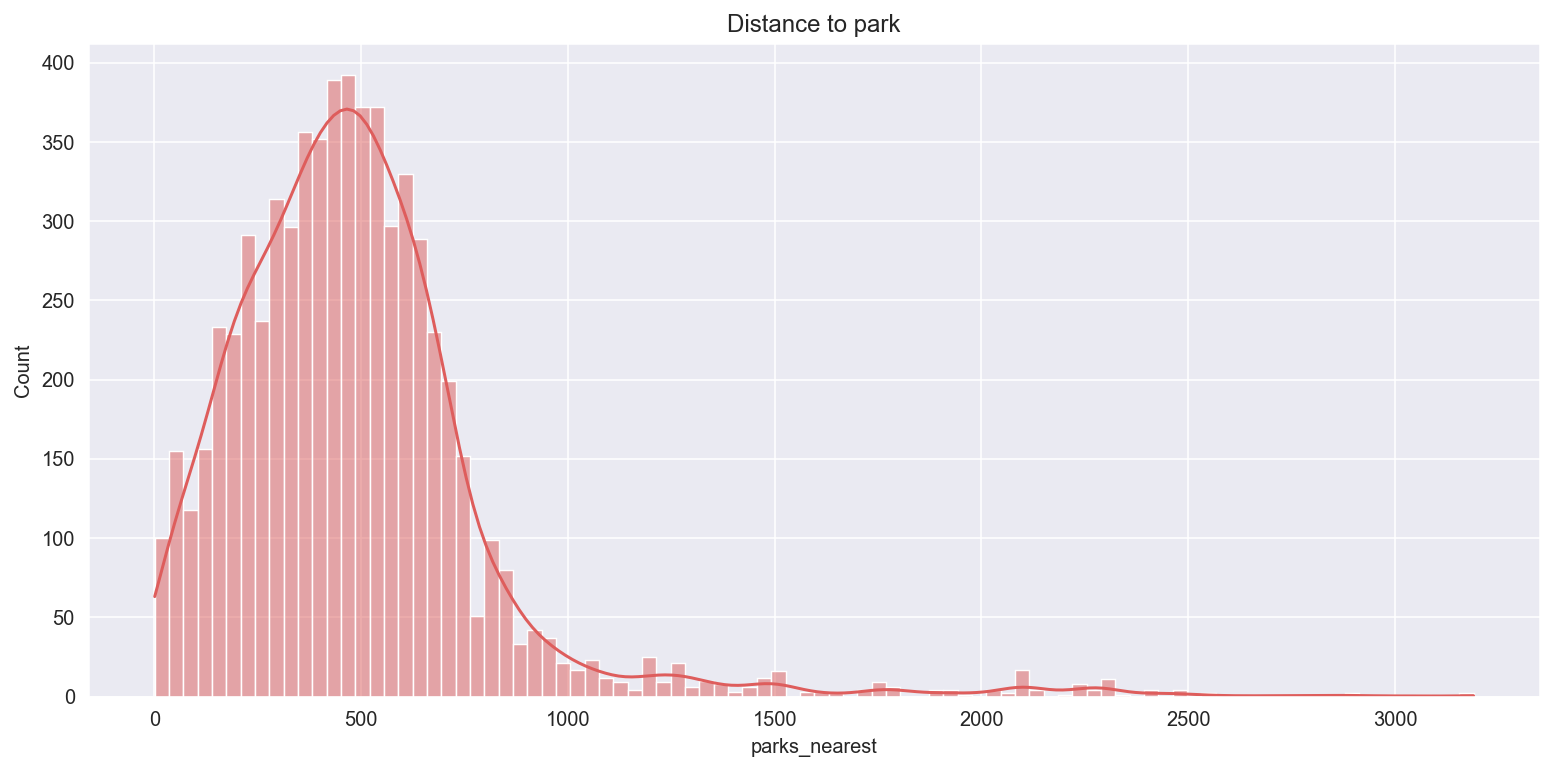

In [61]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='parks_nearest', kde=True, ax=ax1)
ax1.set_title('Distance to park')
plt.show()

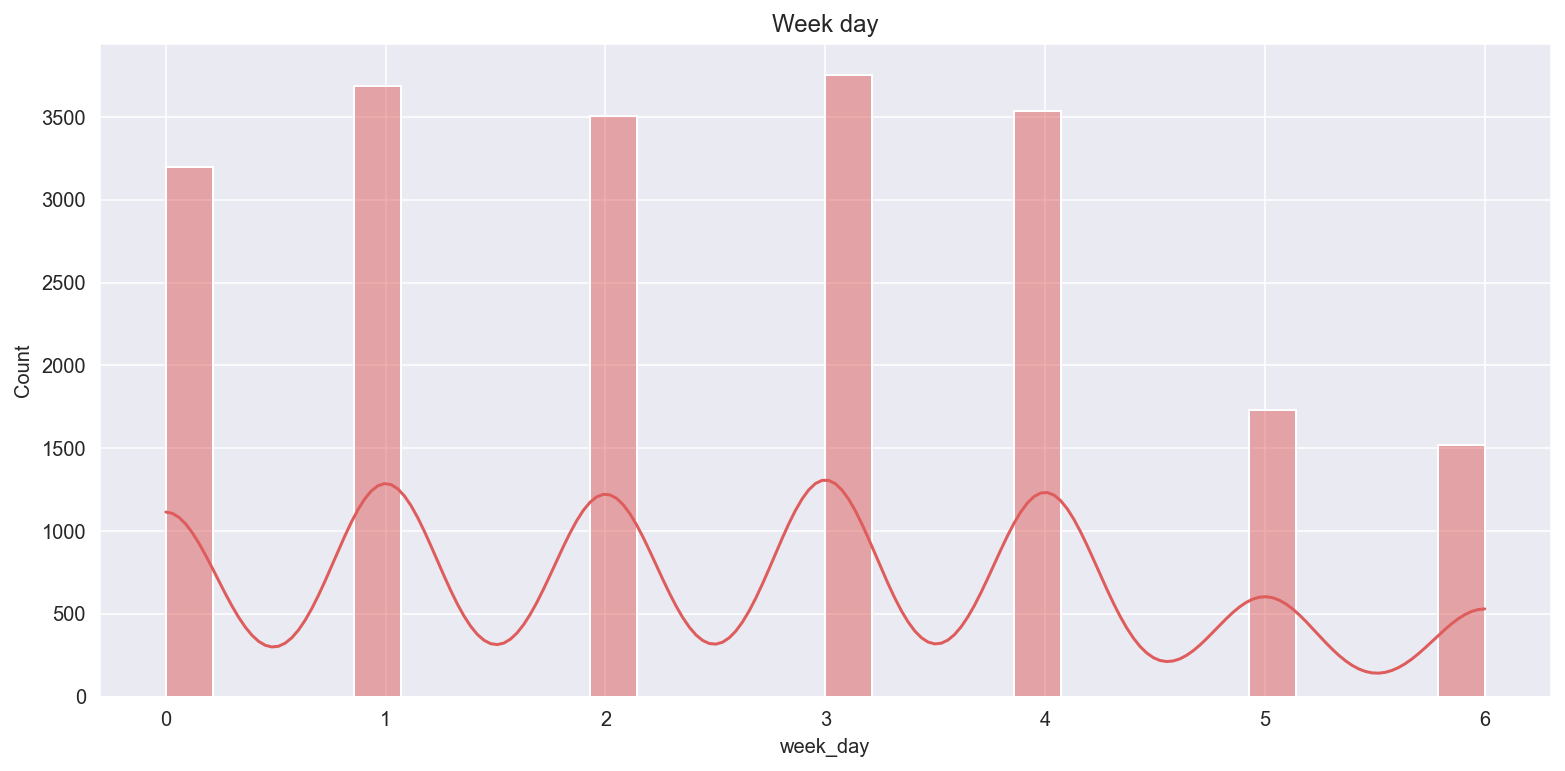

In [62]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='week_day', kde=True, ax=ax1)
ax1.set_title('Week day')
plt.show()

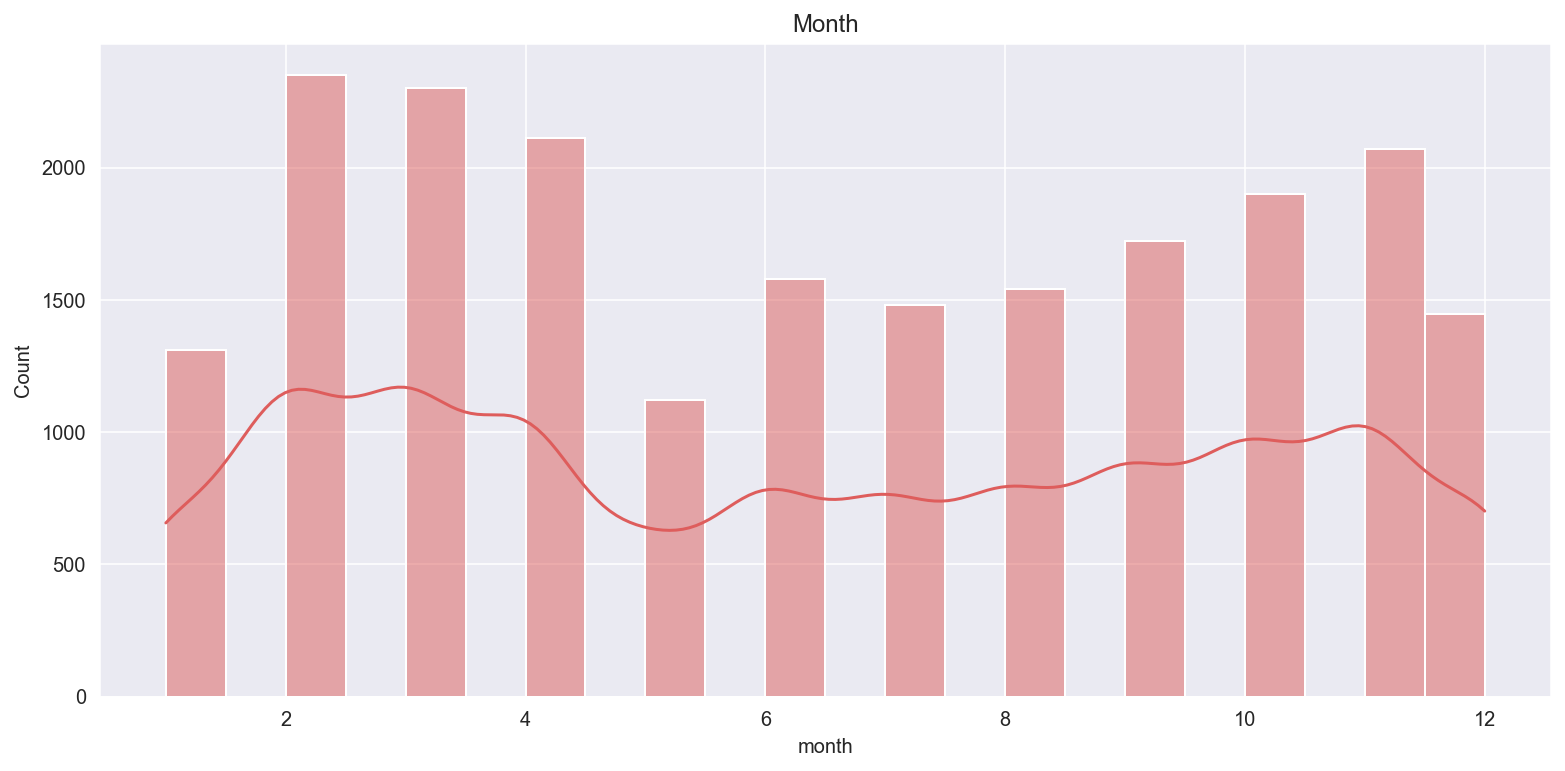

In [63]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='month', kde=True, ax=ax1)
ax1.set_title('Month')
plt.show()

Исходя из полученных графиков можно сделать некоторые выводы. На рынке недвижимости в Санкт-Петербурге и соседних населённых пунктах сложилась следующая ситуация за период с 2014 по 2019 год:

- самые часто выставляемые в объвлениях квартиры - однокомнатные и двухкомнатные;
- самая частая общая площадь квартиры - от 30 до 45 $м^2$, жилая площадь - $18 м^2$,а площадь кухни - от 6 до 10 $м^2$;
- самые частые цены объявлений варьируются приблизительно - от 3 до 4.2 млн. рублей;
- высота потолков в основном составляет примерно 2.6 м.;
- больше всего в объявлениях выставляют квартиры на с 1 по 5 этаж, лидер среди них - 2 этаж, а самая частая общая этажность - 5;
- первый и последний этаж втречаются одинаково редко по сравнению с иными этажностями;
- основное скопление квартир находится в 15 км от центра города, в 15 км от аэропорта и имеют ближайший парк в радиусе 500 м;
- чаще всего объявления выставляют по вторникам и четвергам, при этом в целом по будням объявления выставляют чаще, нежели на выходных. На выходных наблюдается резкий спад в объявлениях. А в месяцах преобладает период с февраля по апрель.

### Как быстро продавались квартиры?

Теперь ответим на вопрос: "Как быстро продавались квартиры?" (`days_exposition` - этот параметр показывает, сколько дней «висело» каждое объявление). Для начала, посмотрим на распредление данного параметра.

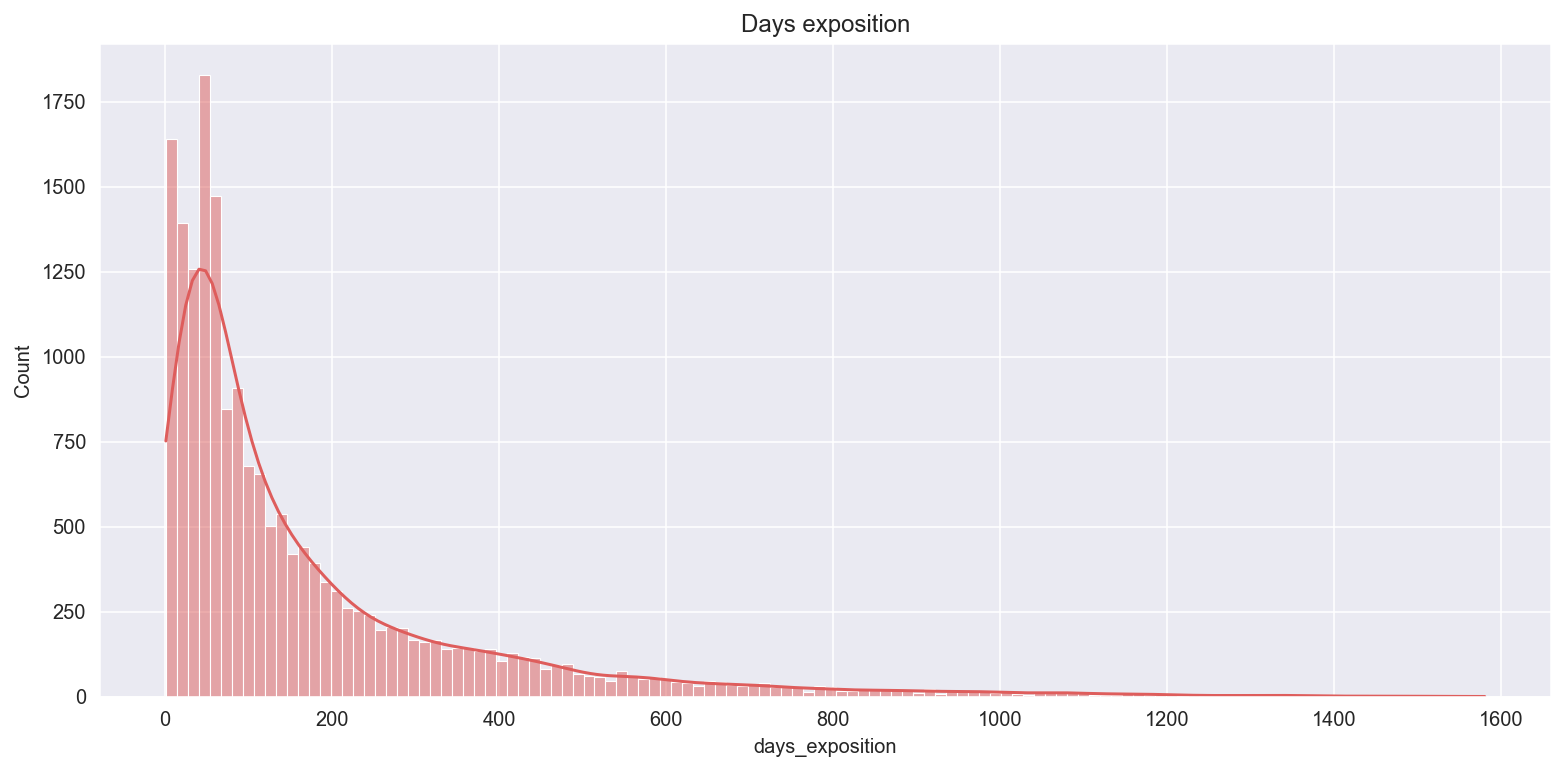

In [64]:
fig, ax1 = plt.subplots(1, figsize=(13, 6))
sns.histplot(data=data, x='days_exposition', kde=True, ax=ax1)
ax1.set_title('Days exposition')
plt.show()

In [65]:
data.days_exposition.describe()

count    18384.000000
mean       172.464698
std        210.356286
min          1.000000
25%         44.000000
50%         91.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

По распределению видно, какие большие выбросы имеются в данных. Изначально не удаляла их, т.к. и так имелись пропуски в данных, которые невозможно было заполнить.  Из-за аномалий в данных среднее колличество дней очень искажено, и оно составляет 172 дня. Более подходящим ответом на поставленный вопрос будет медианное значение в 91 день. Исходя из графика можно сделать вывод, что квартиры в основном продаются в первые 100 дней.

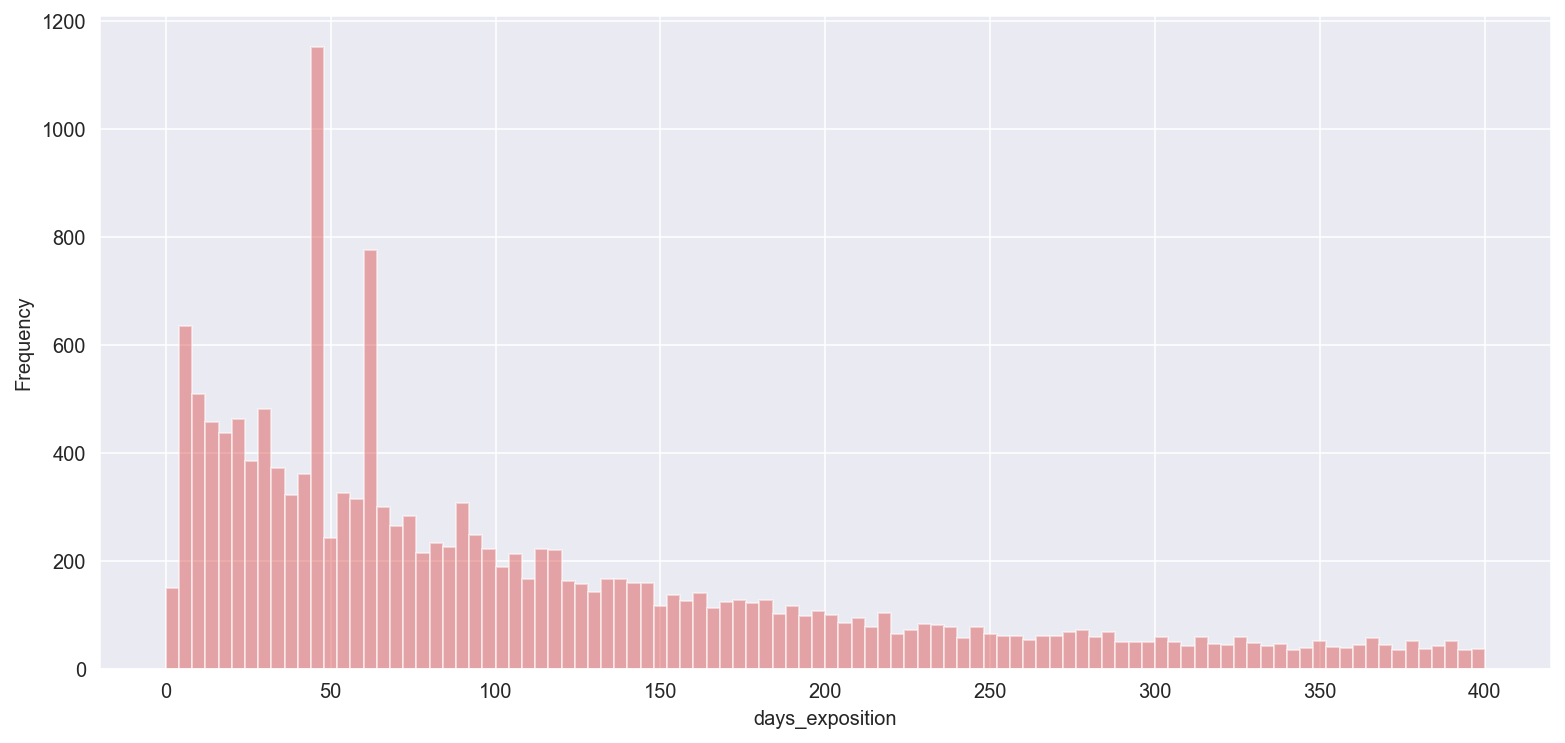

In [66]:
# Рассмотрим гистограмму поближе
data.days_exposition.plot(kind = 'hist', range = (0, 400), bins = 100, figsize = (13, 6), alpha = 0.5)
plt.xlabel('days_exposition')
plt.show()

На 45 и 60  день наблюдаются интересные пики. В интернете нашла интересные особенности у сервиса. Все дело в условиях размещений объявлений в сервисе Яндекс.Недвижимость. Заглянув в условия, можно заметить, что в зависимости от типа объекта, объявления могут быть сняты автоматически на 45 и 60 день. В связи с этим, и количество снятых объявлений в эти дни зашкаливают, что и видно по графику.

Быстрыми продажами можно считать объявления до первого квартиля - т.е. до 44 дней.
Необычно долгими продажами являются продажи согласно отметке третьего квартиля и более - от 219 дней.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

Построим графики, и вычислим коэффициент корреляции Пирсона, которые покажут зависимость цены от указанных ниже параметров . Для подготовки данных перед визуализацией используем сводные таблицы.

Проверим зависимость цены от:
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год)

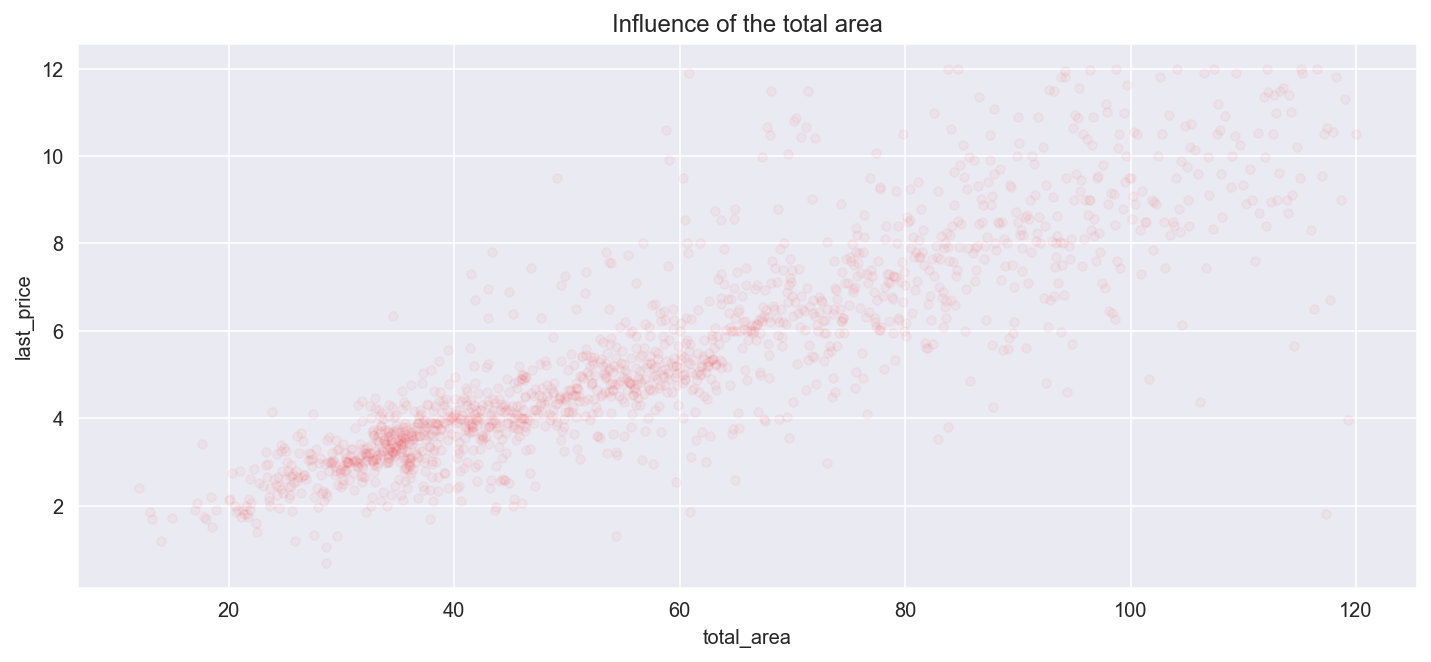

0.69 - коэффициент корреляции


In [67]:
pivot_total_area = pd.pivot_table(data, values='last_price', index='total_area', aggfunc='median').reset_index()
pivot_total_area.plot(x = 'total_area', y = 'last_price', kind='scatter', alpha=0.03, figsize = (12,5), color = 'r', \
                      title='Influence of the total area')
plt.show()

print(round(data['last_price'].corr(data['total_area']), 2), '- коэффициент корреляции')

На графике прослеживается явная зависимость цены от общей площади, и коэффициент корреляции говорит об этом. Чем больше площадь - тем больше цена квартиры. При этом на отметке площади от 60 м связь ослабевает, и начинается уже разброс цен.

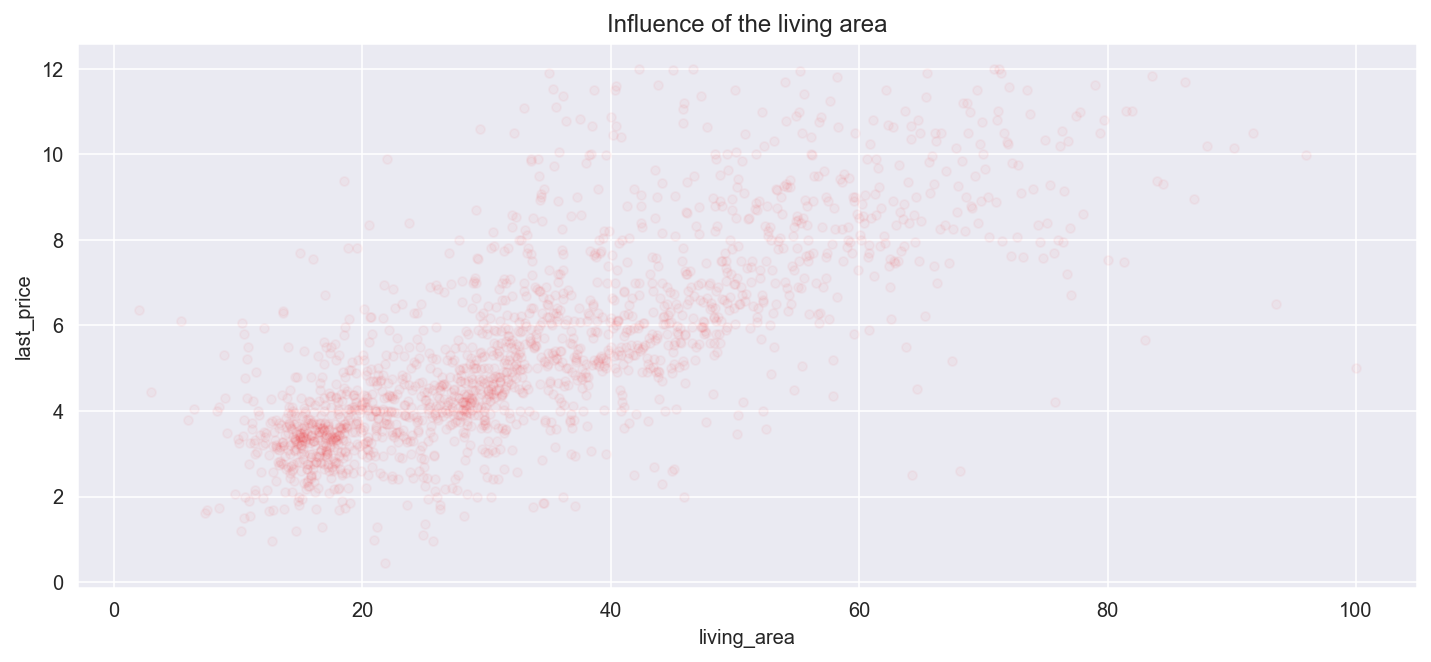

0.58 - коэффициент корреляции


In [68]:
pivot_living_area = pd.pivot_table(data, values='last_price', index='living_area', aggfunc='median').reset_index()
pivot_living_area.plot(x = 'living_area', y = 'last_price', kind='scatter', alpha=0.03, figsize = (12,5), color = 'r', \
                      title='Influence of the living area')
plt.show()

print(round(data['last_price'].corr(data['living_area']), 2), '- коэффициент корреляции')

На данном графике также прослеживает влияние параметров друг на друга. Судя по коэффициенту - праметры коррелируют. Чем больше жилая площадь - тем больше цена. Связь ослабевает на отметке выше 40 м жилой площади.

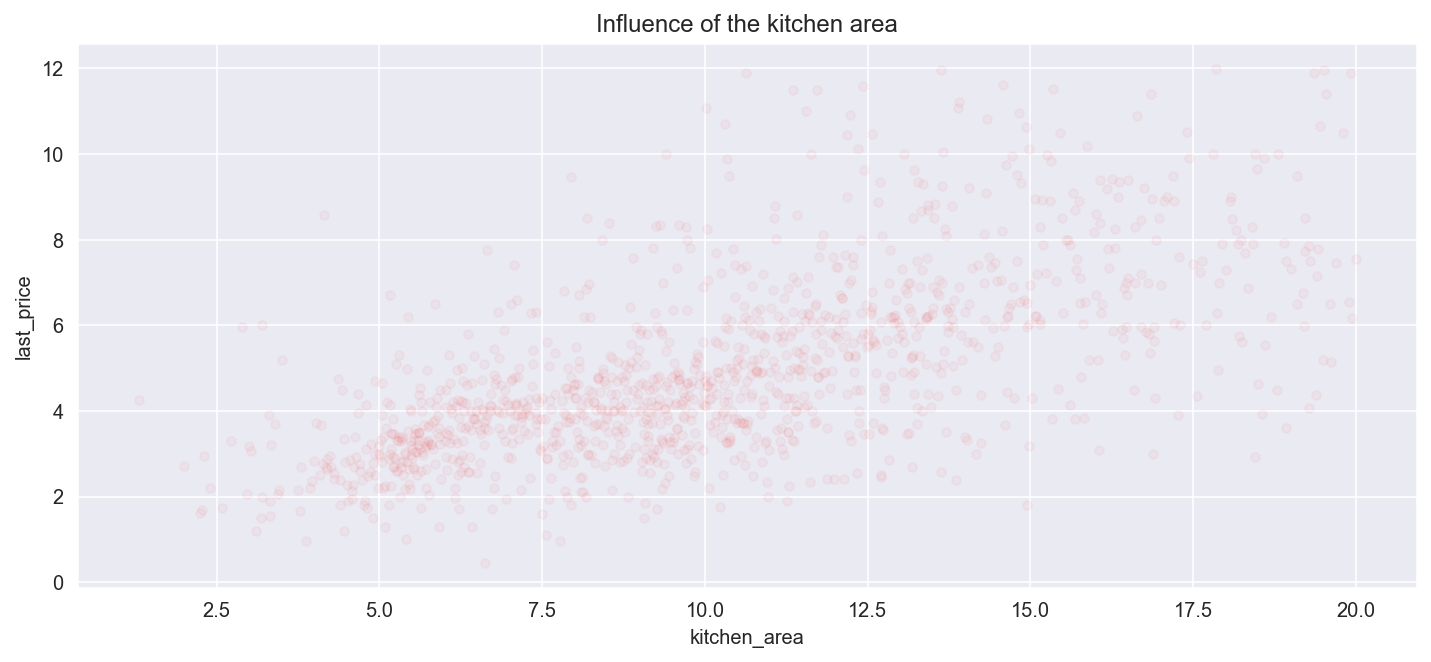

0.5 - коэффициент корреляции


In [69]:
pivot_kitchen_area = pd.pivot_table(data, values='last_price', index='kitchen_area', aggfunc='median').reset_index()
pivot_kitchen_area.plot(x = 'kitchen_area', y = 'last_price', kind='scatter', alpha=0.03, figsize = (12,5), \
                        color = 'r', title='Influence of the kitchen area')
plt.show()

print(round(data['last_price'].corr(data['kitchen_area']), 2), '- коэффициент корреляции')

Площадь кухни также влияет на итоговую цену, но слабее чем общая площадь и жилая площадь. Это видно и по диаграмме рассеяния, и по коэффициенту корреляции. При этом связь ослабевает с увеличением площади кухни

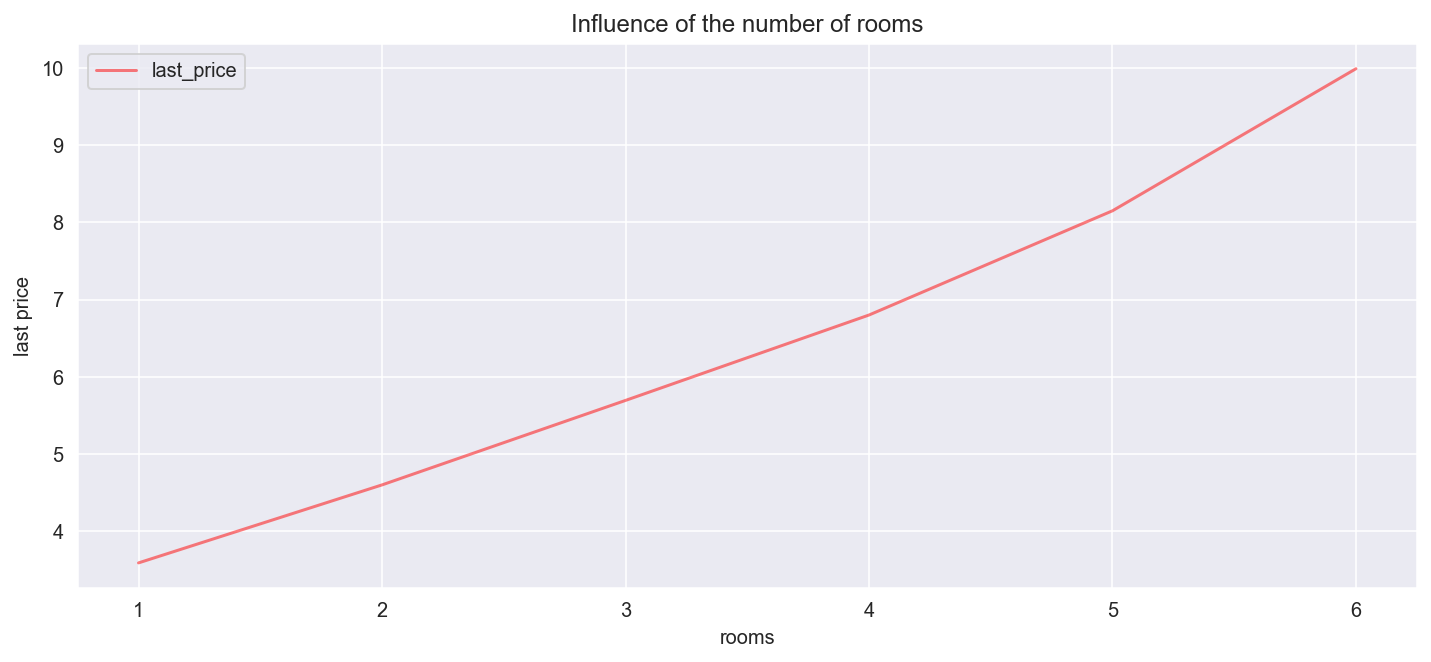

0.44 - коэффициент корреляции


In [70]:
pivot_rooms = pd.pivot_table(data, values='last_price', index='rooms', aggfunc='median').reset_index()
pivot_rooms.plot(x = 'rooms', y = 'last_price', alpha=0.5, figsize = (12,5), color = 'r', \
                 title='Influence of the number of rooms')
plt.ylabel('last price')
plt.show()

print(round(data['last_price'].corr(data['rooms']), 2), '- коэффициент корреляции')

Корреляция прослеживается. И по графику здесь однозначно видно, что чем больше  комнат - тем выше цена квартиры

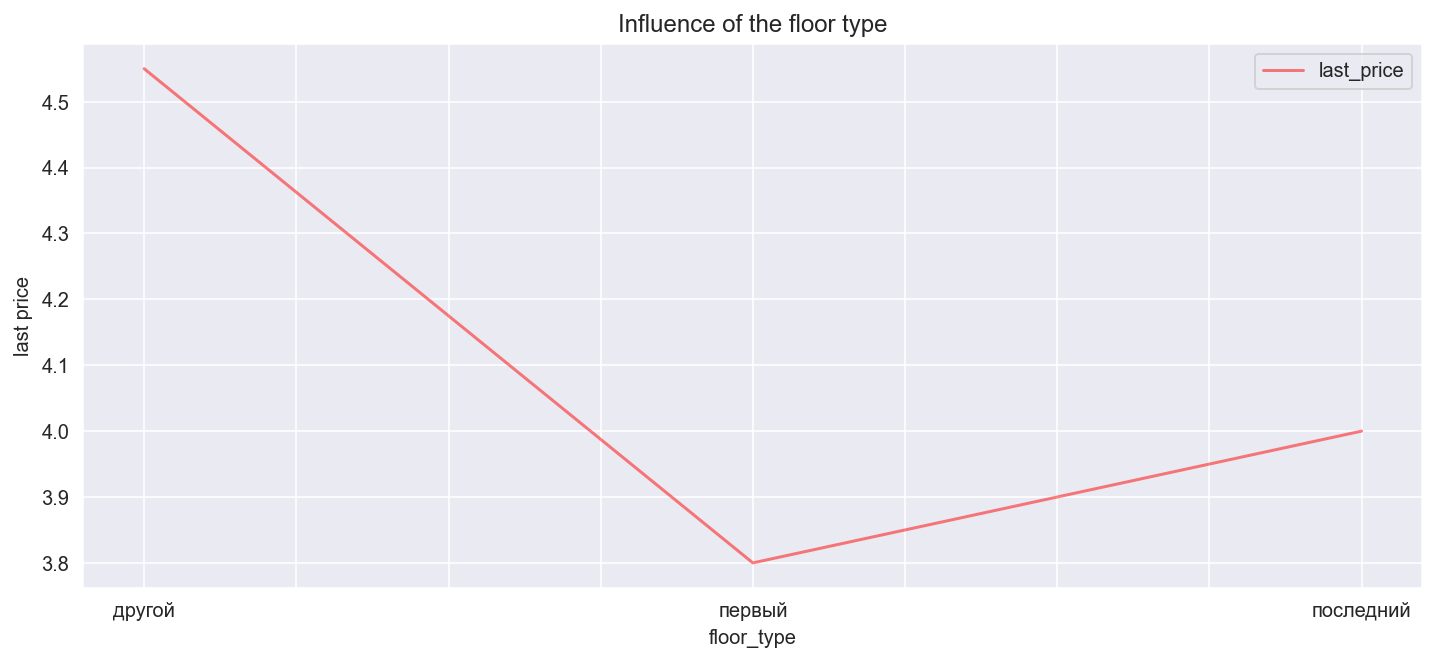

In [71]:
pivot_floor_type = pd.pivot_table(data, values='last_price', index='floor_type', aggfunc='median').reset_index()
pivot_floor_type.plot(x = 'floor_type', y = 'last_price', alpha=0.5, figsize = (12,5), color = 'r',\
                     title='Influence of the floor type')
plt.ylabel('last price')
plt.show()

По типу этажности прослеживается следующее влияние: на первом этаже квартиры стоят дешевле, чем на любой другой этаж. Последний этаж также стоит дешевле, чем иные этажи. 

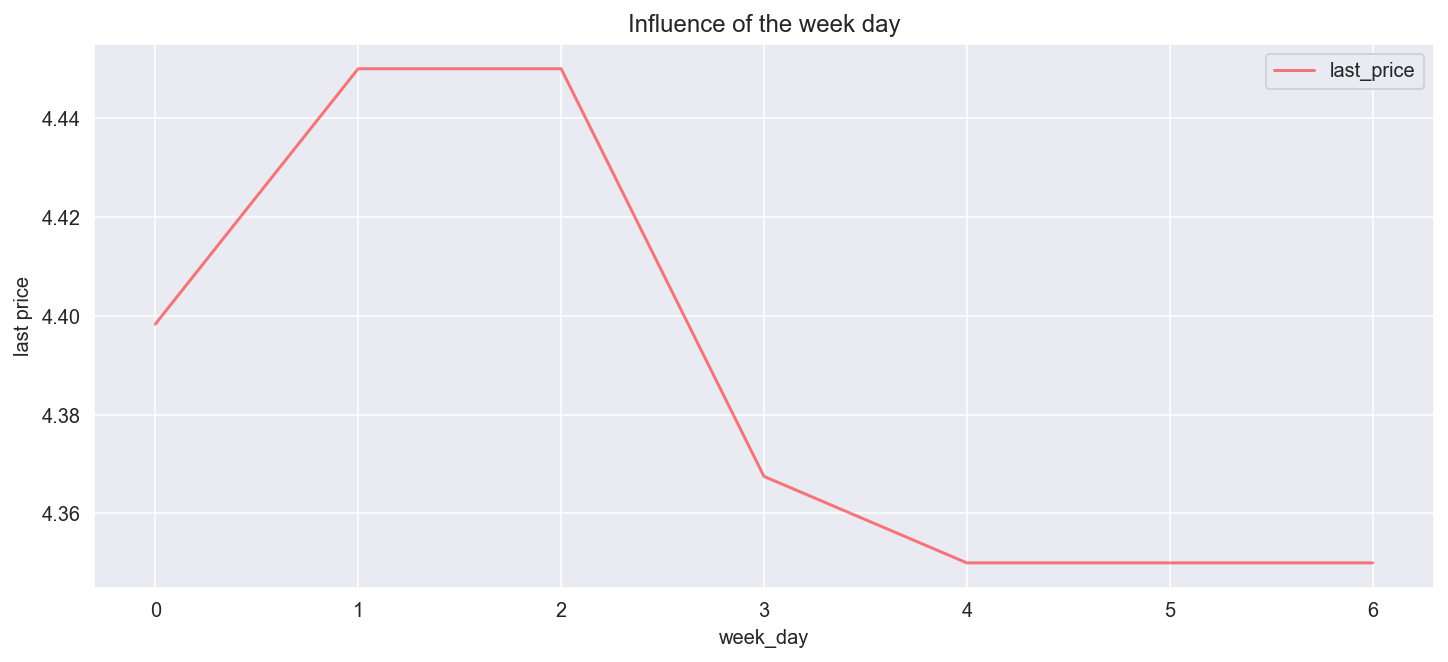

-0.01 - коэффициент корреляции


In [72]:
pivot_week_day = pd.pivot_table(data, values='last_price', index='week_day', aggfunc='median').reset_index()
pivot_week_day.plot(x = 'week_day', y = 'last_price', alpha=0.5, figsize = (12,5), color = 'r', \
                    title='Influence of the week day')
plt.ylabel('last price')
plt.show()

print(round(data['last_price'].corr(data['week_day']), 2), '- коэффициент корреляции')

Корреляция отрицательная, и можно сказать она отсутствует. А по графику все-таки можно отследить, что есть некоторая закономерность. В начале недели цены выше - чем во второй половине недели. Резкий спад цен наблюдается начиная с четверга.

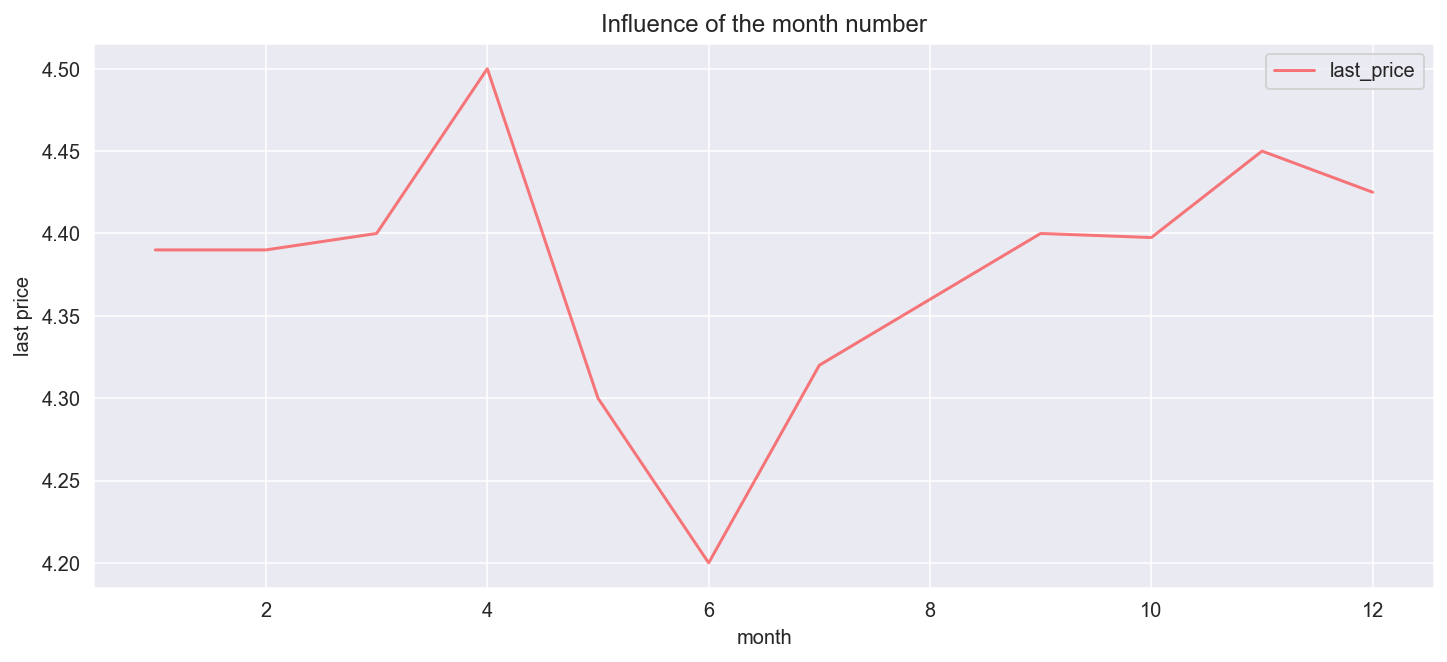

0.01 - коэффициент корреляции


In [73]:
pivot_month = pd.pivot_table(data, values='last_price', index='month', aggfunc='median').reset_index()
pivot_month.plot(x = 'month', y = 'last_price', alpha=0.5, figsize = (12,5), color = 'r',\
                 title='Influence of the month number')
plt.ylabel('last price')
plt.show()

print(round(data['last_price'].corr(data['month']), 2), '- коэффициент корреляции')

Корреляция практически отсутствует. По графику наблюдается особенность: В летний сезон цены значительно падают.

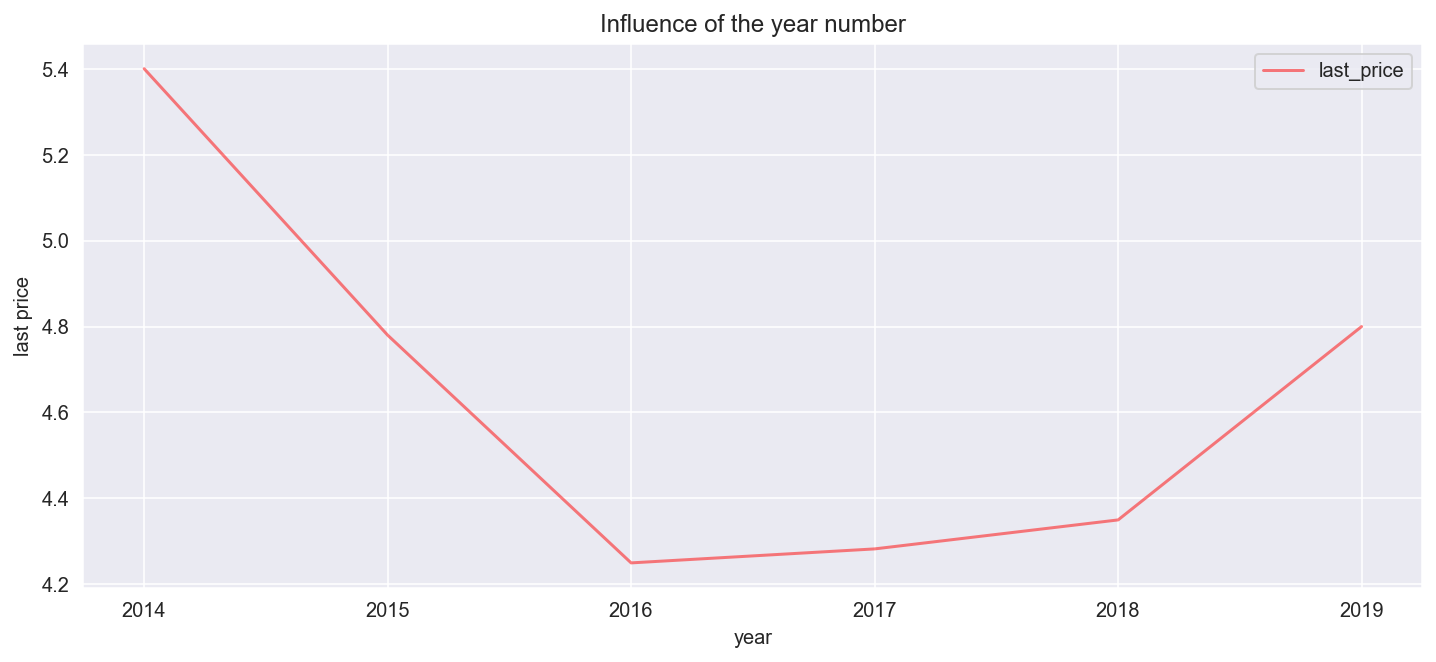

0.0 - коэффициент корреляции


In [74]:
pivot_year = pd.pivot_table(data, values='last_price', index='year', aggfunc='median').reset_index()
pivot_year.plot(x = 'year', y = 'last_price', alpha=0.5, figsize = (12,5), color = 'r', \
                title='Influence of the year number')
plt.ylabel('last price')
plt.show()

print(round(data['last_price'].corr(data['year']), 2), '- коэффициент корреляции')

In [75]:
# посмотрим начальную дату 
data['first_day_exposition'].min()

Timestamp('2014-11-27 00:00:00')

Корреляция отсутствует. В связи с тем, что в наличии у нас данные начиная от конца ноября 2014 года - прослеживается резкий пик в районе 2014 года. Ограниченный набор данных, а также высокое влияние сезонности продаж - могли значительно искозить общую картину. С 2015 года наблюдается резкий спад цен на квартиры. с 2016 пл 2019 года наблюдается рост цен на жилье.

В итоге на поставленный вопрос можно ответить, что на цену  влияют: общая площадь, жилая площадь, кухонная площадь и количество комнат. 

### Средняя цена одного квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [76]:
pivot_data = pd.pivot_table(data, values='price_sq_m', index='locality_name', aggfunc=['count','mean'])\
                             .sort_values(by = ('count', 'price_sq_m') , ascending = False).head(10).reset_index()
pivot_data

,locality_name,count,mean
,,price_sq_m,price_sq_m
0,санкт-петербург,13273,0.105475
1,поселок мурино,522,0.085026
2,поселок шушары,430,0.078266
3,всеволожск,381,0.067014
4,колпино,331,0.075238
5,пушкин,328,0.100082
6,поселок парголово,320,0.090413
7,гатчина,300,0.068545
8,деревня кудрово,269,0.092740


In [77]:
# Выведем населенный пункт с самой высокой стоимостью квадратного метра
pivot_data[pivot_data['mean']['price_sq_m'] == max(pivot_data['mean']['price_sq_m'])]

,locality_name,count,mean
,,price_sq_m,price_sq_m
0,санкт-петербург,13273,0.105475


In [78]:
# Выведем населенный пункт с самой низкой стоимостью квадратного метра
pivot_data[pivot_data['mean']['price_sq_m'] == min(pivot_data['mean']['price_sq_m'])]

,locality_name,count,mean
,,price_sq_m,price_sq_m
9,выборг,225,0.058014


Самая высокая средняя цена $м^2$ ожидаемо оказалась в Санкт-Петербурге в 105 475 р., а самая низкая - в Выборге в 58 014 р. Средние цены отличаются в 1.82 раза.

### Зависимость стоимости объектов от расстояния до центра города

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

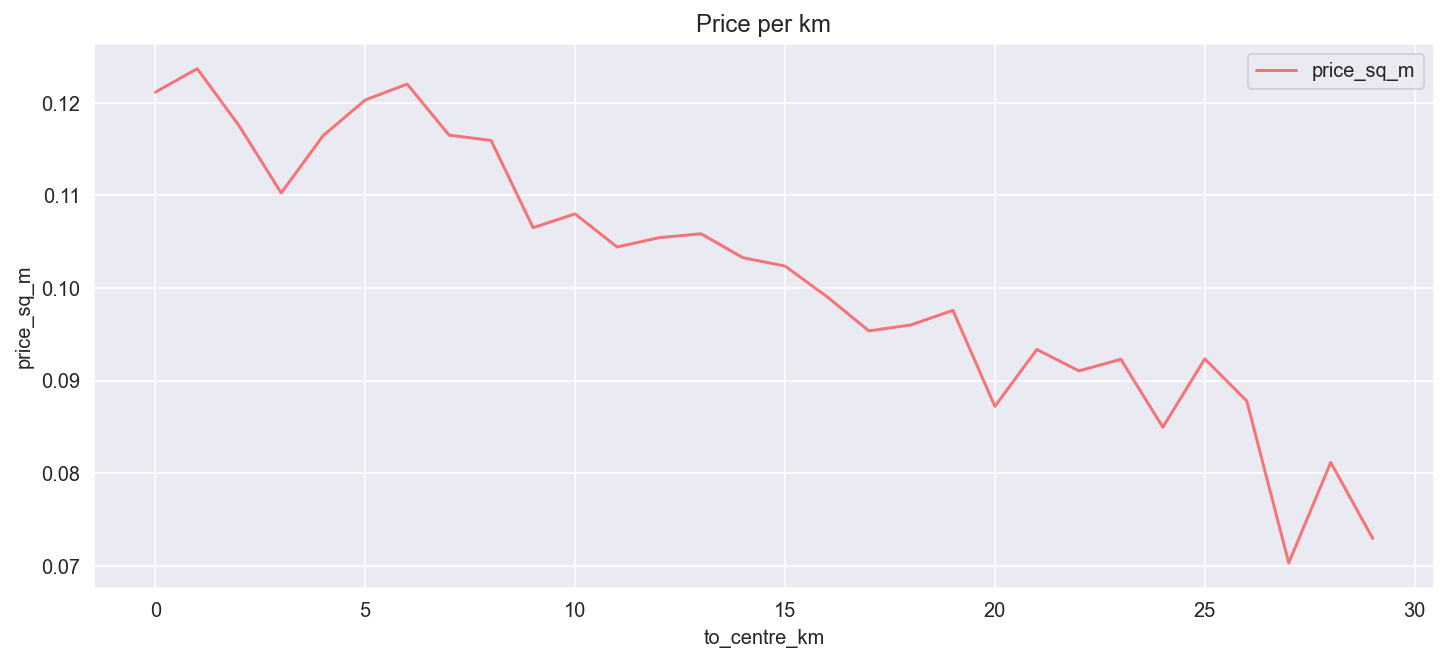

In [79]:
spb = data.loc[data.loc[:, 'locality_name'] == 'санкт-петербург'].reset_index()
spb['to_centre_km'] = spb['to_centre_km'].apply(lambda x: round(x, 0))          
price_per_km_spb = pd.pivot_table(spb, index = 'to_centre_km', values = 'price_sq_m', \
                aggfunc = 'mean').reset_index()
price_per_km_spb.plot(x = 'to_centre_km', y = 'price_sq_m', alpha=0.5, figsize = (12,5), color = 'r', \
                title='Price per km')
plt.ylabel('price_sq_m')
plt.show()

По графику видно - чем ближе к центру - тем выше стоимость 1 $м^2$  жилья. Также интересен спад цены примерно в трех километрах от центра города. Могу предположить, что возможно он обусловлен особенностью районов города. Как мне известно, недалеко от центра имеются промзоны. 

## Общий вывод

В данном проекте мы исследовали данные из сервиса Яндекс.Недвижимость о продаже квартир в в Санкт-Петербурге и соседних населённых пунктах. Данные были предоставлены за 2014 - 2019г. О каждой квартире в базе содержатся два типа данных: добавленные пользователем и картографические. Моей задачей было выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

В данных большая часть пропущенных значений была в картографических данных. Также, в 2019 году обнаружен резкий спад фиксации данных по количеству дней с даты выставления объявления и до его снятия. Возможно это обусловлено техническими особенностями системы. Но рекомендую коллегам проверить качество выгрузки данных.  

В ходе предобработки данных были устранены пропуски данных - там, где это было возможно, изменены типы данных. Также, из датасета были удалены аномальные значения. Всего из датасета были удалены 11,67% данных, которые могли искозить последующий анализ.

В ходе анализа данных были выявлены некоторые закономерности:

- самые часто выставляемые в объвлениях квартиры - однокомнатные и двухкомнатные;
- большинство квартир продается в первые 100 дней продажи;
- в данных имеются объявления с необычно долгим общим сроком публикации в сервисе - более семи месяцев;
- цена квартир зависит от следующих факторов: влияют общая, жилая, кухонная площади и количество комнат;
- наблюдаются такие закономерности как: спад цены в летний сезон и то, что во второй половине недели публикуются менее дорогие объявления, чем в первую половину;
- начиная с 2016 года наблюдается рост цен на недвижимость;
- самый дорогой $м^2$ квартиры в Санкт-Петербурге, а самый недорогой - в Выборге;
- на цену $м^2$ в Санкт - Петербурге влияет удаленность от центра города, т.е. чем ближе к центру - тем дороже недвижимость. При этом на трех км от центра города наблюдается резкий спад цен.